<a href="https://colab.research.google.com/github/123jyoti614/Credit_card_cutomer_churn_prediction/blob/main/creditcard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (

    RandomForestClassifier,
    BaggingClassifier,
)
#from xgboost import XGBClassifier

#!pip install lightgbm
#import lightgbm as lgb

from sklearn.dummy import DummyClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    #plot_confusion_matrix,
    #plot_roc_curve,
)

# To be used for data scaling and encoding
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    OneHotEncoder,
    RobustScaler,
)
from sklearn.impute import SimpleImputer

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin


# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# set the background for the graphs
plt.style.use("ggplot")

# For pandas profiling
#!pip install typing-extensions --upgrade
#from pandas_profiling import ProfileReport

# Printing style
!pip install tabulate
from tabulate import tabulate

# To supress warnings
import warnings

# date time
from datetime import datetime
warnings.filterwarnings("ignore")

In [2]:
churner=pd.read_csv('/content/BankChurners.csv')
churner.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3     12691.000                  777        11914.000   
1                      2      8256.000                  864         7392.000   
2                      0      3418.000                    0         3418.000   
3                      1      3313.000                 2517          796.000   
4                      0      4716.000                    0         4716.000   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                              0.000                                                                                    
1                                              0.000                                                                                    
2                                              0.000                                                                                    
3                                              0.000                                                                                    
4                                              0.000                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                              1.000                                                                                   
1                                              1.000                                                                                   
2                                              1.000                                                                                   
3                                              1.000                                                                                   
4                                              1.000

In [3]:
churner.shape

(10127, 23)

In [4]:

additional_droppable_columns = [
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
]

for col in additional_droppable_columns:
    if col in churner.columns.unique().tolist():
        churner.drop(columns=[col], inplace=True)

In [5]:
churner.shape

(10127, 21)

In [6]:
df=churner.copy()
df.shape

(10127, 21)

In [7]:
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3     12691.000                  777        11914.000   
1                      2      8256.000                  864         7392.000   
2                      0      3418.000                    0         3418.000   
3                      1      3313.000                 2517          796.000   
4                      0      4716.000                    0         4716.000   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  
0                  0.061  
1                  0.105  
2                  0.000  
3                  0.760  
4                  0.000

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df = df.drop_duplicates()


In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:

# let's check for missing values in the data
df_null_summary = pd.concat(
    [df.isnull().sum(), df.isnull().sum() * 100 / df.isnull().count()], axis=1
)
df_null_summary.columns = ["Null Record Count", "Percentage of Null Records"]
df_null_summary[df_null_summary["Null Record Count"] > 0].sort_values(
    by="Percentage of Null Records", ascending=False
).style.background_gradient(cmap="YlOrRd")

In [13]:
df.select_dtypes(include="object").nunique()

Attrition_Flag     2
Gender             2
Education_Level    7
Marital_Status     4
Income_Category    6
Card_Category      4
dtype: int64

In [14]:
df.select_dtypes(exclude="object").nunique()

CLIENTNUM                   10127
Customer_Age                   45
Dependent_count                 6
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

In [15]:
df.describe().T

count          mean          std           min  \
CLIENTNUM                10127.000 739177606.334 36903783.450 708082083.000   
Customer_Age             10127.000        46.326        8.017        26.000   
Dependent_count          10127.000         2.346        1.299         0.000   
Months_on_book           10127.000        35.928        7.986        13.000   
Total_Relationship_Count 10127.000         3.813        1.554         1.000   
Months_Inactive_12_mon   10127.000         2.341        1.011         0.000   
Contacts_Count_12_mon    10127.000         2.455        1.106         0.000   
Credit_Limit             10127.000      8631.954     9088.777      1438.300   
Total_Revolving_Bal      10127.000      1162.814      814.987         0.000   
Avg_Open_To_Buy          10127.000      7469.140     9090.685         3.000   
Total_Amt_Chng_Q4_Q1     10127.000         0.760        0.219         0.000   
Total_Trans_Amt          10127.000      4404.086     3397.129       510.000   
Total_Trans_Ct           10127.000        64.859       23.473        10.000   
Total_Ct_Chng_Q4_Q1      10127.000         0.712        0.238         0.000   
Avg_Utilization_Ratio    10127.000         0.275        0.276         0.000   

                                   25%           50%           75%  \
CLIENTNUM                713036770.500 717926358.000 773143533.000   
Customer_Age                    41.000        46.000        52.000   
Dependent_count                  1.000         2.000         3.000   
Months_on_book                  31.000        36.000        40.000   
Total_Relationship_Count         3.000         4.000         5.000   
Months_Inactive_12_mon           2.000         2.000         3.000   
Contacts_Count_12_mon            2.000         2.000         3.000   
Credit_Limit                  2555.000      4549.000     11067.500   
Total_Revolving_Bal            359.000      1276.000      1784.000   
Avg_Open_To_Buy               1324.500      3474.000      9859.000   
Total_Amt_Chng_Q4_Q1             0.631         0.736         0.859   
Total_Trans_Amt               2155.500      3899.000      4741.000   
Total_Trans_Ct                  45.000        67.000        81.000   
Total_Ct_Chng_Q4_Q1              0.582         0.702         0.818   
Avg_Utilization_Ratio            0.023         0.176         0.503   

                                   max  
CLIENTNUM                828343083.000  
Customer_Age                    73.000  
Dependent_count                  5.000  
Months_on_book                  56.000  
Total_Relationship_Count         6.000  
Months_Inactive_12_mon           6.000  
Contacts_Count_12_mon            6.000  
Credit_Limit                 34516.000  
Total_Revolving_Bal           2517.000  
Avg_Open_To_Buy              34516.000  
Total_Amt_Chng_Q4_Q1             3.397  
Total_Trans_Amt              18484.000  
Total_Trans_Ct                 139.000  
Total_Ct_Chng_Q4_Q1              3.714  
Avg_Utilization_Ratio            0.999

In [16]:

# let's view the statistical summary of the categorical columns in the data
df.describe(include="object").T

count unique                top  freq
Attrition_Flag   10127      2  Existing Customer  8500
Gender           10127      2                  F  5358
Education_Level  10127      7           Graduate  3128
Marital_Status   10127      4            Married  4687
Income_Category  10127      6     Less than $40K  3561
Card_Category    10127      4               Blue  9436

In [17]:
# Below function prints unique value counts and percentages for the category/object type variables


def category_unique_value():
    for cat_cols in (
        df.select_dtypes(exclude=[np.int64, np.float64]).columns.unique().to_list()
    ):
        print("Unique values and corresponding data counts for feature: " + cat_cols)
        print("-" * 90)
        df_temp = pd.concat(
            [
                df[cat_cols].value_counts(),
                df[cat_cols].value_counts(normalize=True) * 100,
            ],
            axis=1,
        )
        df_temp.columns = ["Count", "Percentage"]
        print(df_temp)
        print("-" * 90)

In [18]:
category_unique_value()

Unique values and corresponding data counts for feature: Attrition_Flag
------------------------------------------------------------------------------------------
                   Count  Percentage
Attrition_Flag                      
Existing Customer   8500      83.934
Attrited Customer   1627      16.066
------------------------------------------------------------------------------------------
Unique values and corresponding data counts for feature: Gender
------------------------------------------------------------------------------------------
        Count  Percentage
Gender                   
F        5358      52.908
M        4769      47.092
------------------------------------------------------------------------------------------
Unique values and corresponding data counts for feature: Education_Level
------------------------------------------------------------------------------------------
                 Count  Percentage
Education_Level                   
Graduate      

In [20]:
df.drop(columns=["CLIENTNUM"], inplace=True)

In [21]:

df["Education_Level"] = df["Education_Level"].fillna("Unknown")
df["Marital_Status"] = df["Marital_Status"].fillna("Unknown")

In [22]:
category_unique_value()

Unique values and corresponding data counts for feature: Attrition_Flag
------------------------------------------------------------------------------------------
                   Count  Percentage
Attrition_Flag                      
Existing Customer   8500      83.934
Attrited Customer   1627      16.066
------------------------------------------------------------------------------------------
Unique values and corresponding data counts for feature: Gender
------------------------------------------------------------------------------------------
        Count  Percentage
Gender                   
F        5358      52.908
M        4769      47.092
------------------------------------------------------------------------------------------
Unique values and corresponding data counts for feature: Education_Level
------------------------------------------------------------------------------------------
                 Count  Percentage
Education_Level                   
Graduate      

In [23]:

category_columns = df.select_dtypes(include="object").columns.tolist()



In [25]:
df[category_columns] = df[category_columns].astype("category")

In [26]:

df.columns = [i.replace(" ", "_").lower() for i in df.columns]

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   attrition_flag            10127 non-null  category
 1   customer_age              10127 non-null  int64   
 2   gender                    10127 non-null  category
 3   dependent_count           10127 non-null  int64   
 4   education_level           10127 non-null  category
 5   marital_status            10127 non-null  category
 6   income_category           10127 non-null  category
 7   card_category             10127 non-null  category
 8   months_on_book            10127 non-null  int64   
 9   total_relationship_count  10127 non-null  int64   
 10  months_inactive_12_mon    10127 non-null  int64   
 11  contacts_count_12_mon     10127 non-null  int64   
 12  credit_limit              10127 non-null  float64 
 13  total_revolving_bal       10127 non-null  int6

EDA

Univariate Analysis

In [36]:
def summary(df: pd.DataFrame, x: str):
    """
    The function prints the 5 point summary and histogram, box plot,
    violin plot, and cumulative density distribution plots for each
    feature name passed as the argument.

    Parameters:
    ----------

    x: str, feature name

    Usage:
    ------------

    summary('age')
    """
    x_min = df[x].min()
    x_max = df[x].max()
    Q1 = df[x].quantile(0.25)
    Q2 = df[x].quantile(0.50)
    Q3 = df[x].quantile(0.75)

    dict_summary = {"Min": x_min, "Q1": Q1, "Q2": Q2, "Q3": Q3, "Max": x_max}
    df1 = pd.DataFrame(dict_summary, index=["Value"])
    print(f"5 Point Summary of {x.capitalize()} Attribute:\n")
    print(tabulate(df1, headers="keys", tablefmt="psql"))

    fig = plt.figure(figsize=(16, 8))
    plt.subplots_adjust(hspace=0.6)
    sns.set_palette("Pastel1")
    plt.subplot(221, frameon=True)
    ax1 = sns.distplot(df[x], color="purple")
    ax1.axvline(
        np.mean(df[x]), color="purple", linestyle="--"
    )  # Add mean to the histogram
    ax1.axvline(
        np.median(df[x]), color="black", linestyle="-"
    )  # Add median to the histogram
    plt.title(f"{x.capitalize()} Density Distribution")

   # plt.subplot(222, frameon=True)
    #ax2 = sns.violinplot(x=data[x], palette="Accent", split=True)
    #plt.title(f"{x.capitalize()} Violinplot")

    plt.subplot(223, frameon=True, sharex=ax1)
    ax3 = sns.boxplot(
        x=df[x], palette="cool", width=0.7, linewidth=0.6, showmeans=True
    )
    plt.title(f"{x.capitalize()} Boxplot")

    #plt.subplot(224, frameon=True, sharex=ax2)
    #ax4 = sns.kdeplot(data[x], cumulative=True)
    plt.title(f"{x.capitalize()} Cumulative Density Distribution")

    plt.show()


5 Point Summary of Customer_age Attribute:

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |    26 |   41 |   46 |   52 |    73 |
+-------+-------+------+------+------+-------+


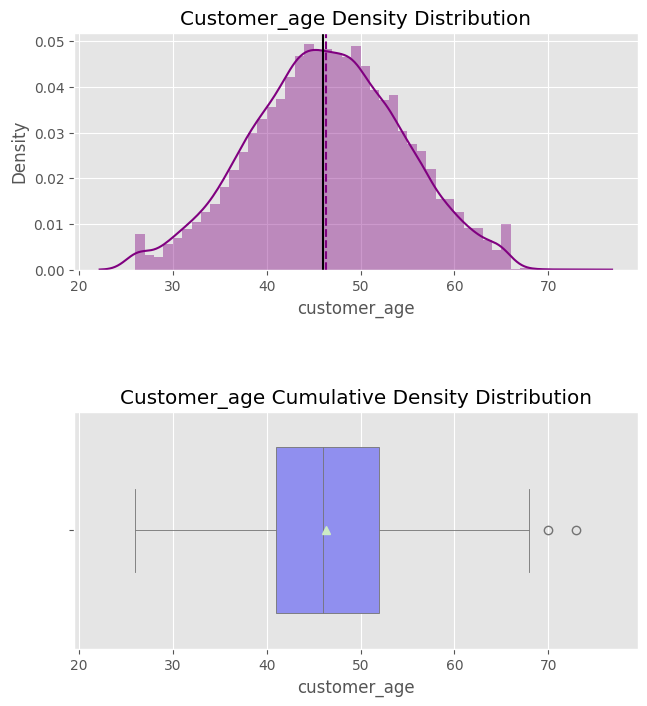

In [37]:

summary(df,"customer_age")

5 Point Summary of Dependent_count Attribute:

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |     0 |    1 |    2 |    3 |     5 |
+-------+-------+------+------+------+-------+


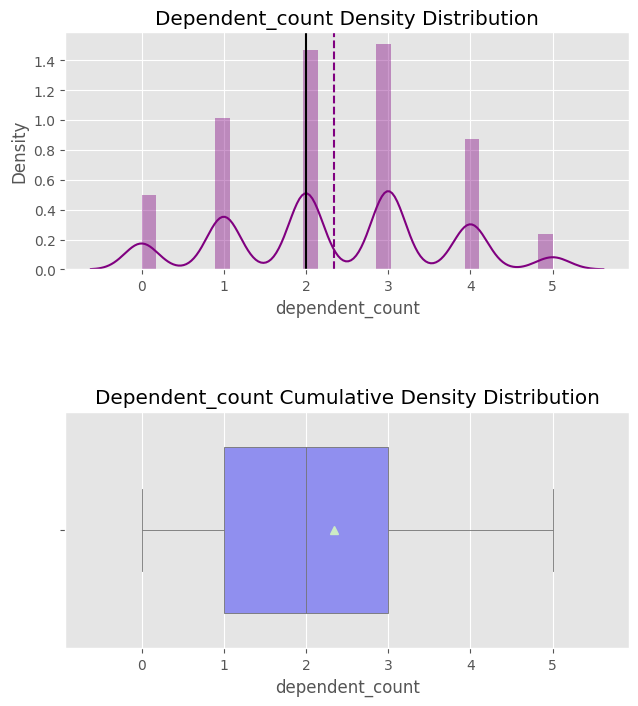

In [38]:
summary(df,"dependent_count")

5 Point Summary of Months_on_book Attribute:

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |    13 |   31 |   36 |   40 |    56 |
+-------+-------+------+------+------+-------+


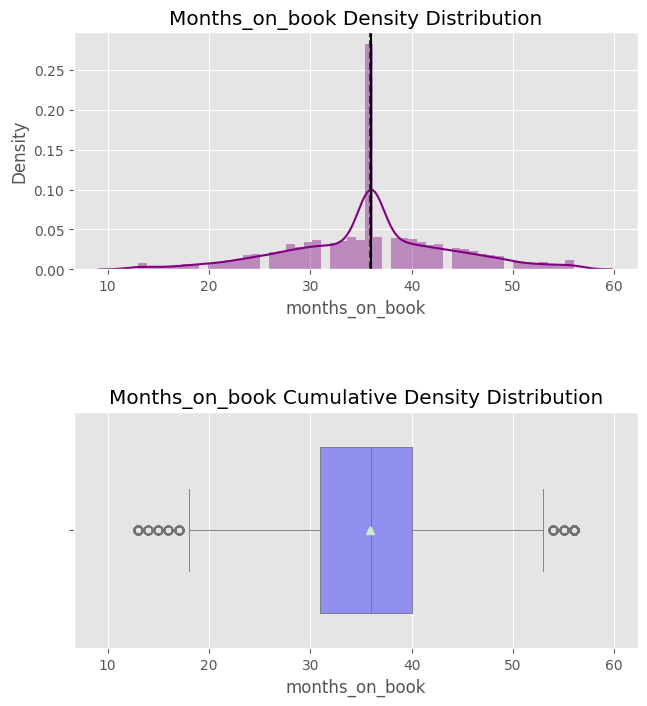

In [39]:

summary(df,"months_on_book")

5 Point Summary of Total_relationship_count Attribute:

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |     1 |    3 |    4 |    5 |     6 |
+-------+-------+------+------+------+-------+


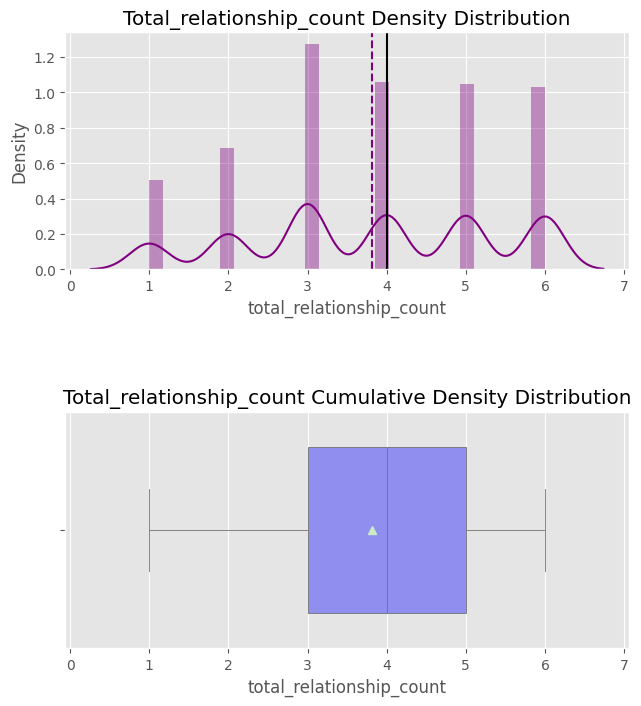

In [40]:
summary(df,"total_relationship_count")

5 Point Summary of Months_inactive_12_mon Attribute:

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |     0 |    2 |    2 |    3 |     6 |
+-------+-------+------+------+------+-------+


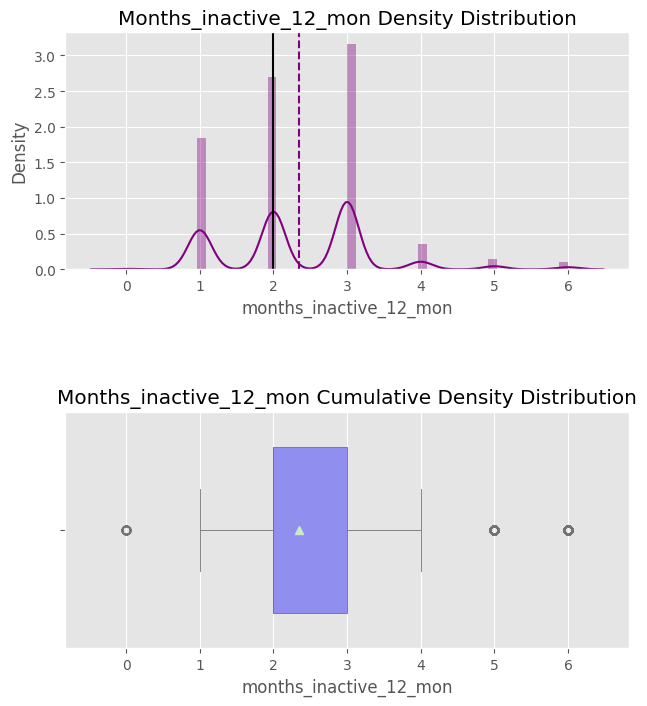

In [41]:
summary(df,"months_inactive_12_mon")

5 Point Summary of Contacts_count_12_mon Attribute:

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |     0 |    2 |    2 |    3 |     6 |
+-------+-------+------+------+------+-------+


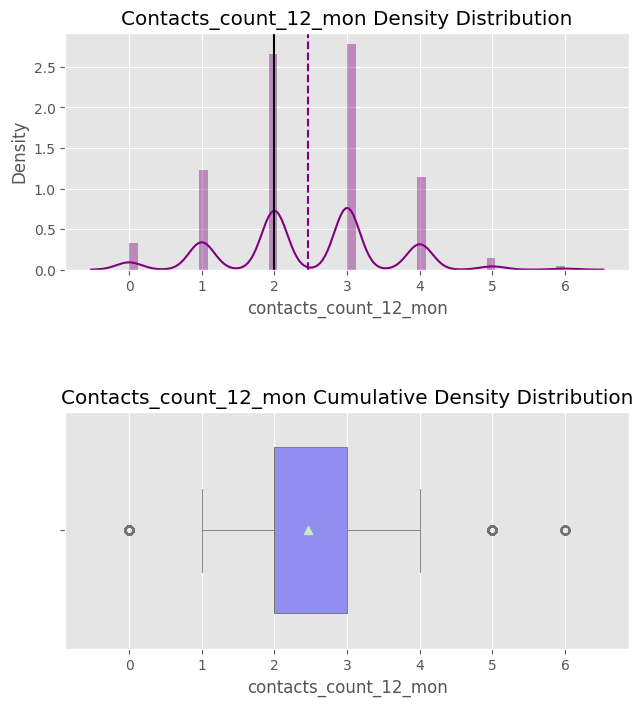

In [42]:
summary(df,"contacts_count_12_mon")

5 Point Summary of Credit_limit Attribute:

+-------+--------+------+------+---------+-------+
|       |    Min |   Q1 |   Q2 |      Q3 |   Max |
|-------+--------+------+------+---------+-------|
| Value | 1438.3 | 2555 | 4549 | 11067.5 | 34516 |
+-------+--------+------+------+---------+-------+


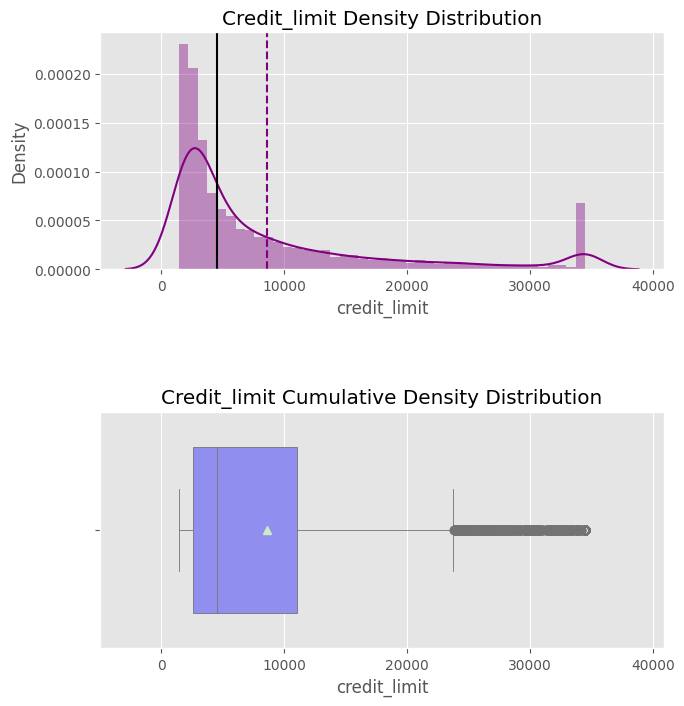

In [43]:
summary(df,"credit_limit")

In [44]:

df[df["credit_limit"] > 23000]["income_category"].value_counts(normalize=True)


income_category
$80K - $120K     0.421
$120K +          0.302
$60K - $80K      0.156
Unknown          0.110
$40K - $60K      0.012
Less than $40K   0.000
Name: proportion, dtype: float64

In [45]:
df[df["credit_limit"] > 23000]["card_category"].value_counts(normalize=True)

card_category
Blue       0.592
Silver     0.310
Gold       0.083
Platinum   0.015
Name: proportion, dtype: float64

5 Point Summary of Total_revolving_bal Attribute:

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |     0 |  359 | 1276 | 1784 |  2517 |
+-------+-------+------+------+------+-------+


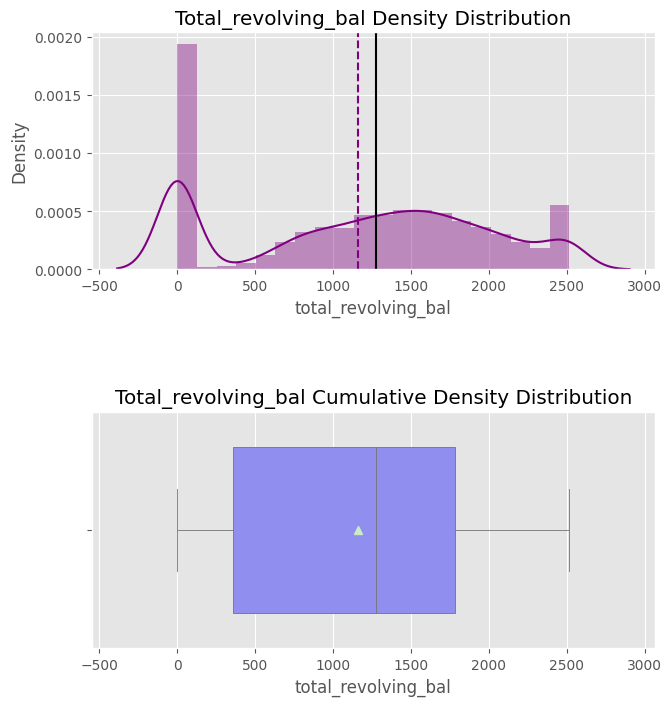

In [46]:

summary(df, "total_revolving_bal")

5 Point Summary of Avg_open_to_buy Attribute:

+-------+-------+--------+------+------+-------+
|       |   Min |     Q1 |   Q2 |   Q3 |   Max |
|-------+-------+--------+------+------+-------|
| Value |     3 | 1324.5 | 3474 | 9859 | 34516 |
+-------+-------+--------+------+------+-------+


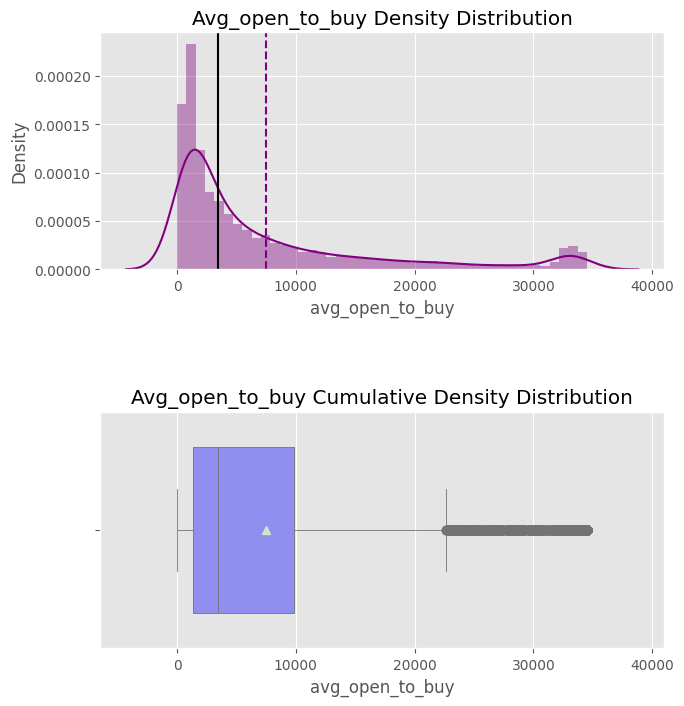

In [47]:

summary(df, "avg_open_to_buy")

5 Point Summary of Total_amt_chng_q4_q1 Attribute:

+-------+-------+-------+-------+-------+-------+
|       |   Min |    Q1 |    Q2 |    Q3 |   Max |
|-------+-------+-------+-------+-------+-------|
| Value |     0 | 0.631 | 0.736 | 0.859 | 3.397 |
+-------+-------+-------+-------+-------+-------+


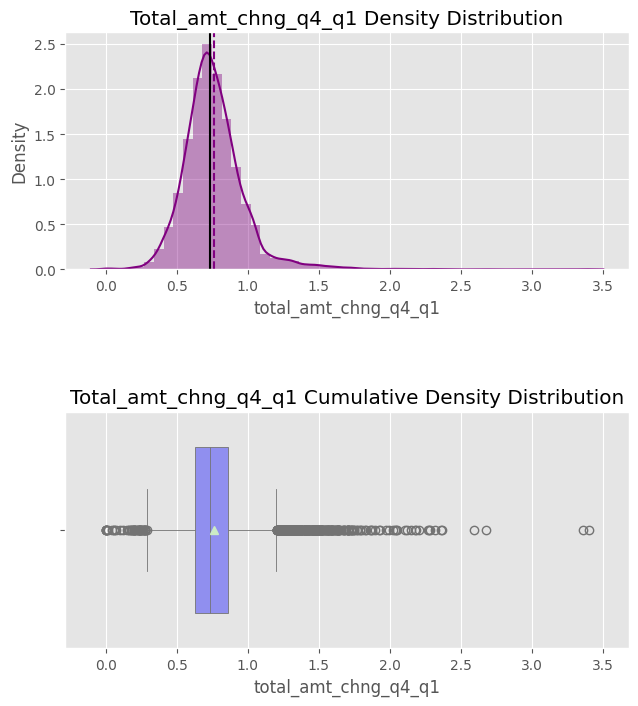

In [48]:

summary(df, "total_amt_chng_q4_q1")

5 Point Summary of Total_trans_amt Attribute:

+-------+-------+--------+------+------+-------+
|       |   Min |     Q1 |   Q2 |   Q3 |   Max |
|-------+-------+--------+------+------+-------|
| Value |   510 | 2155.5 | 3899 | 4741 | 18484 |
+-------+-------+--------+------+------+-------+


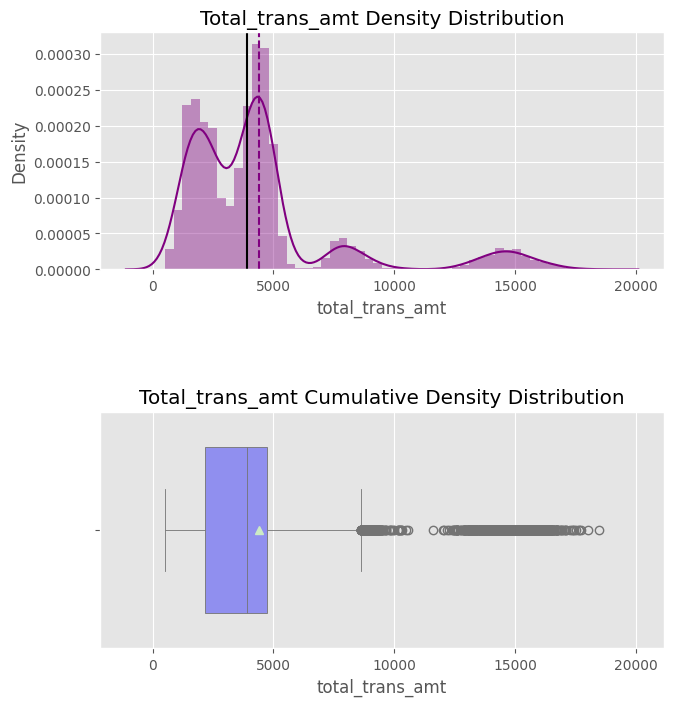

In [49]:

summary(df, "total_trans_amt")

5 Point Summary of Total_trans_ct Attribute:

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |    10 |   45 |   67 |   81 |   139 |
+-------+-------+------+------+------+-------+


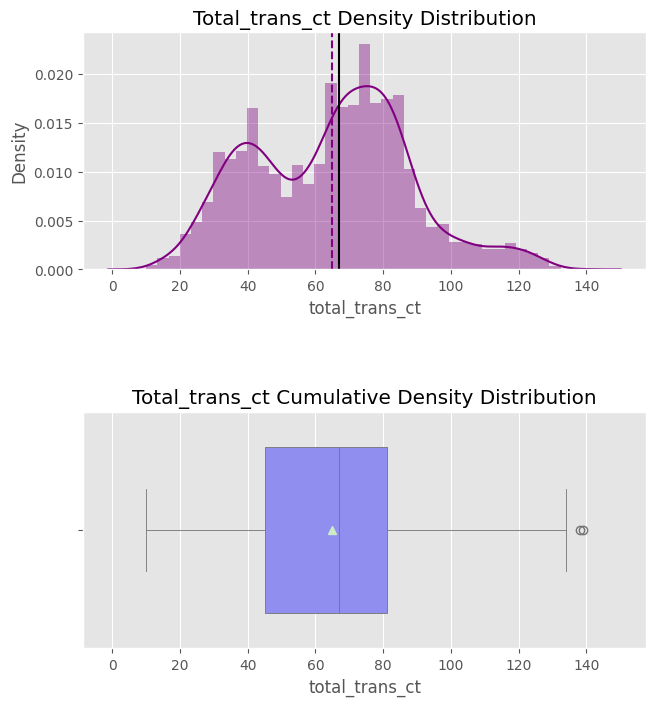

In [50]:
summary(df, "total_trans_ct")


5 Point Summary of Total_ct_chng_q4_q1 Attribute:

+-------+-------+-------+-------+-------+-------+
|       |   Min |    Q1 |    Q2 |    Q3 |   Max |
|-------+-------+-------+-------+-------+-------|
| Value |     0 | 0.582 | 0.702 | 0.818 | 3.714 |
+-------+-------+-------+-------+-------+-------+


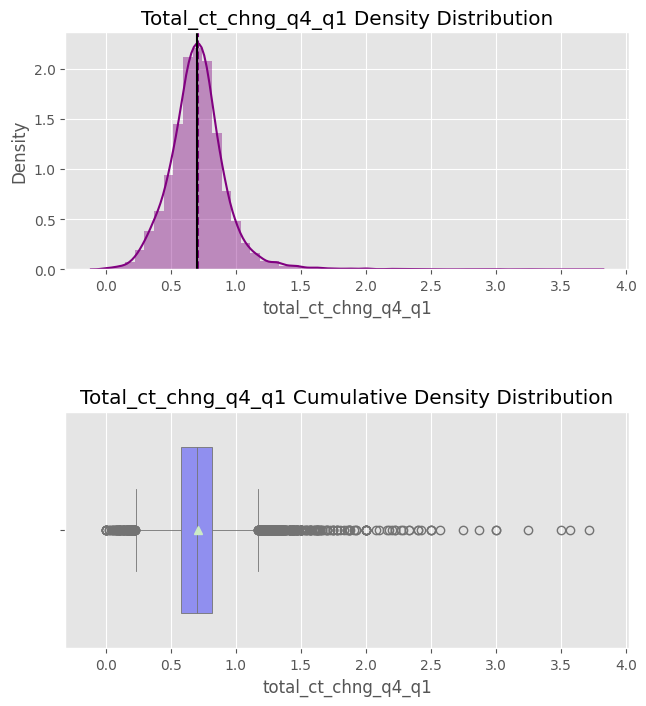

In [51]:

summary(df, "total_ct_chng_q4_q1")

5 Point Summary of Avg_utilization_ratio Attribute:

+-------+-------+-------+-------+-------+-------+
|       |   Min |    Q1 |    Q2 |    Q3 |   Max |
|-------+-------+-------+-------+-------+-------|
| Value |     0 | 0.023 | 0.176 | 0.503 | 0.999 |
+-------+-------+-------+-------+-------+-------+


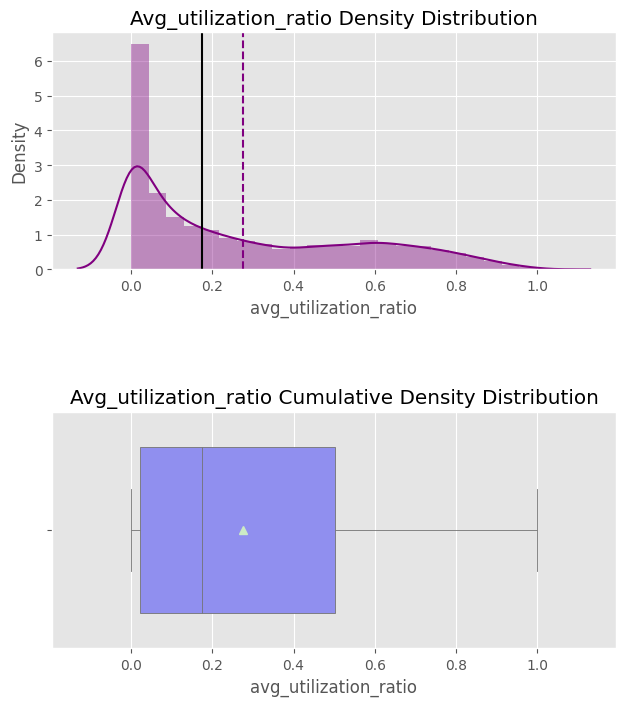

In [52]:
summary(df, "avg_utilization_ratio")

In [53]:
# Below code plots grouped bar for each categorical feature

def perc_on_bar(data: pd.DataFrame, cat_columns, target, hue=None, perc=True):
    '''
    The function takes a category column as input and plots bar chart with percentages on top of each bar

    Usage:
    ------

    perc_on_bar(df, ['age'], 'prodtaken')
    '''

    subplot_cols = 2
    subplot_rows = int(len(cat_columns)/2 + 1)
    plt.figure(figsize=(16,3*subplot_rows))
    for i, col in enumerate(cat_columns):
        plt.subplot(subplot_rows,subplot_cols,i+1)
        order = data[col].value_counts(ascending=False).index  # Data order
        ax=sns.countplot(data=df, x=col, palette = 'crest', order=order, hue=hue);
        for p in ax.patches:
            percentage = '{:.1f}%\n({})'.format(100 * p.get_height()/len(df[target]), p.get_height())
            # Added percentage and actual value
            x = p.get_x() + p.get_width() / 2
            y = p.get_y() + p.get_height() + 40
            if perc:
                plt.annotate(percentage, (x, y), ha='center', color='black', fontsize='medium'); # Annotation on top of bars
            plt.xticks(color='black', fontsize='medium', rotation= (-90 if col=='region' else 0));
            plt.tight_layout()
            plt.title(col.capitalize() + ' Percentage Bar Charts\n\n')


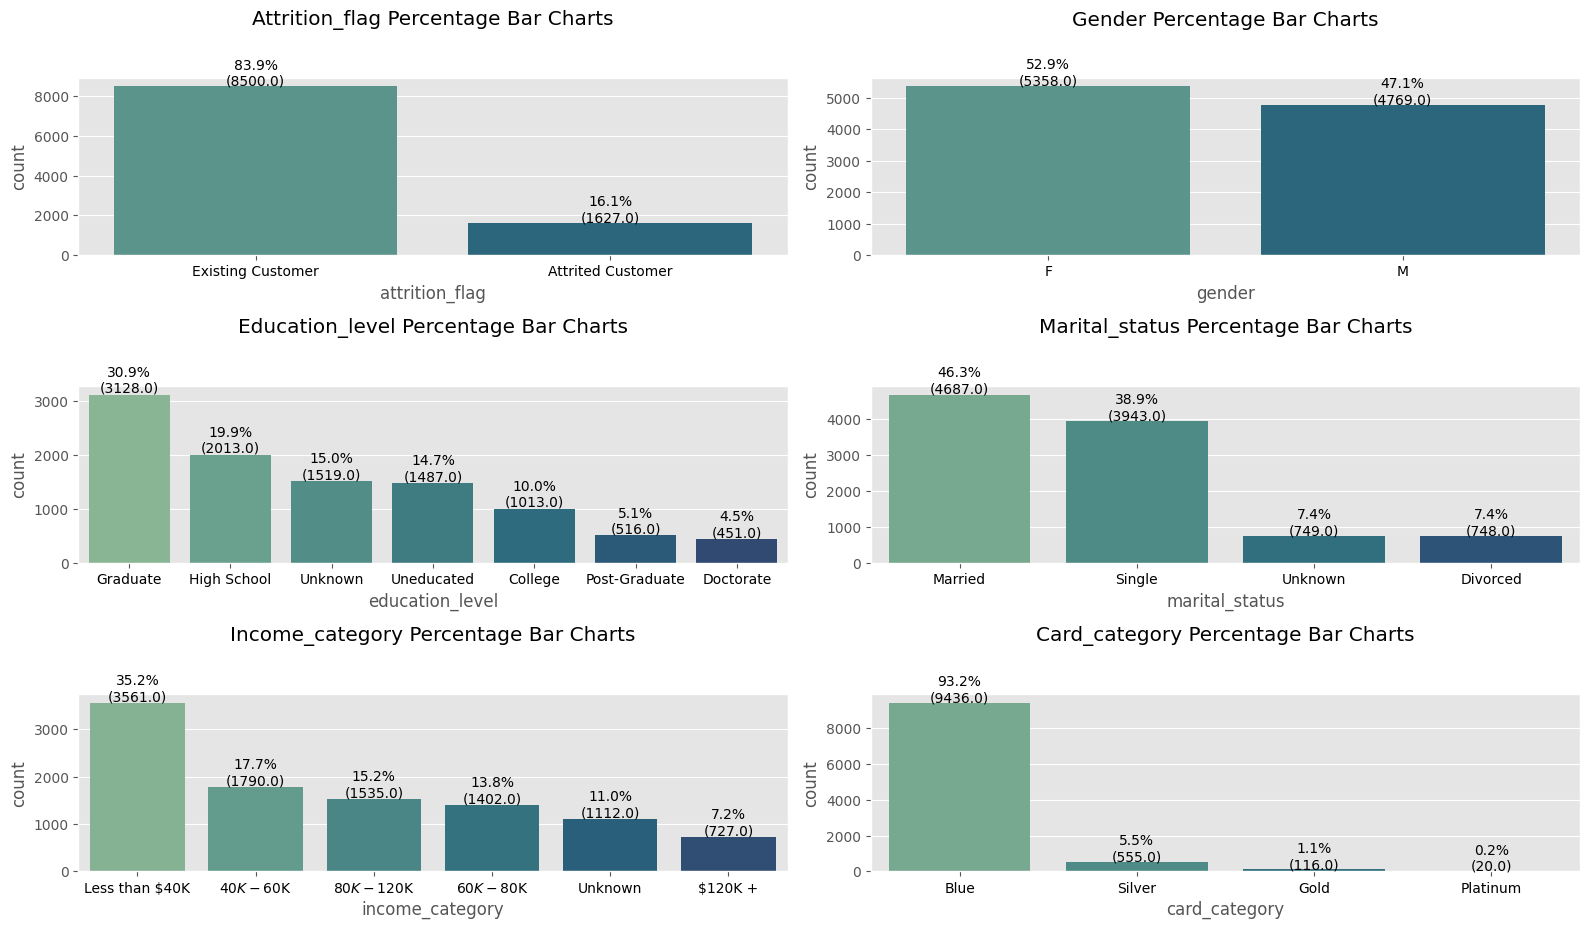

In [54]:

category_columns = df.select_dtypes(include="category").columns.tolist()
target_variable = "attrition_flag"
perc_on_bar(df, category_columns, target_variable)


High Imbalance in data since the existing vs. attrited customers ratio is 84:16
Data is almost equally distributed between Males and Females
31% customers are Graduate
~85% customers are either Single or Married, where 46.7% of the customers are Married
35% customers earn less than $40k and 36% earns $60k or more
~93% customers have Blue card

multivariate


<Figure size 2000x2000 with 0 Axes>

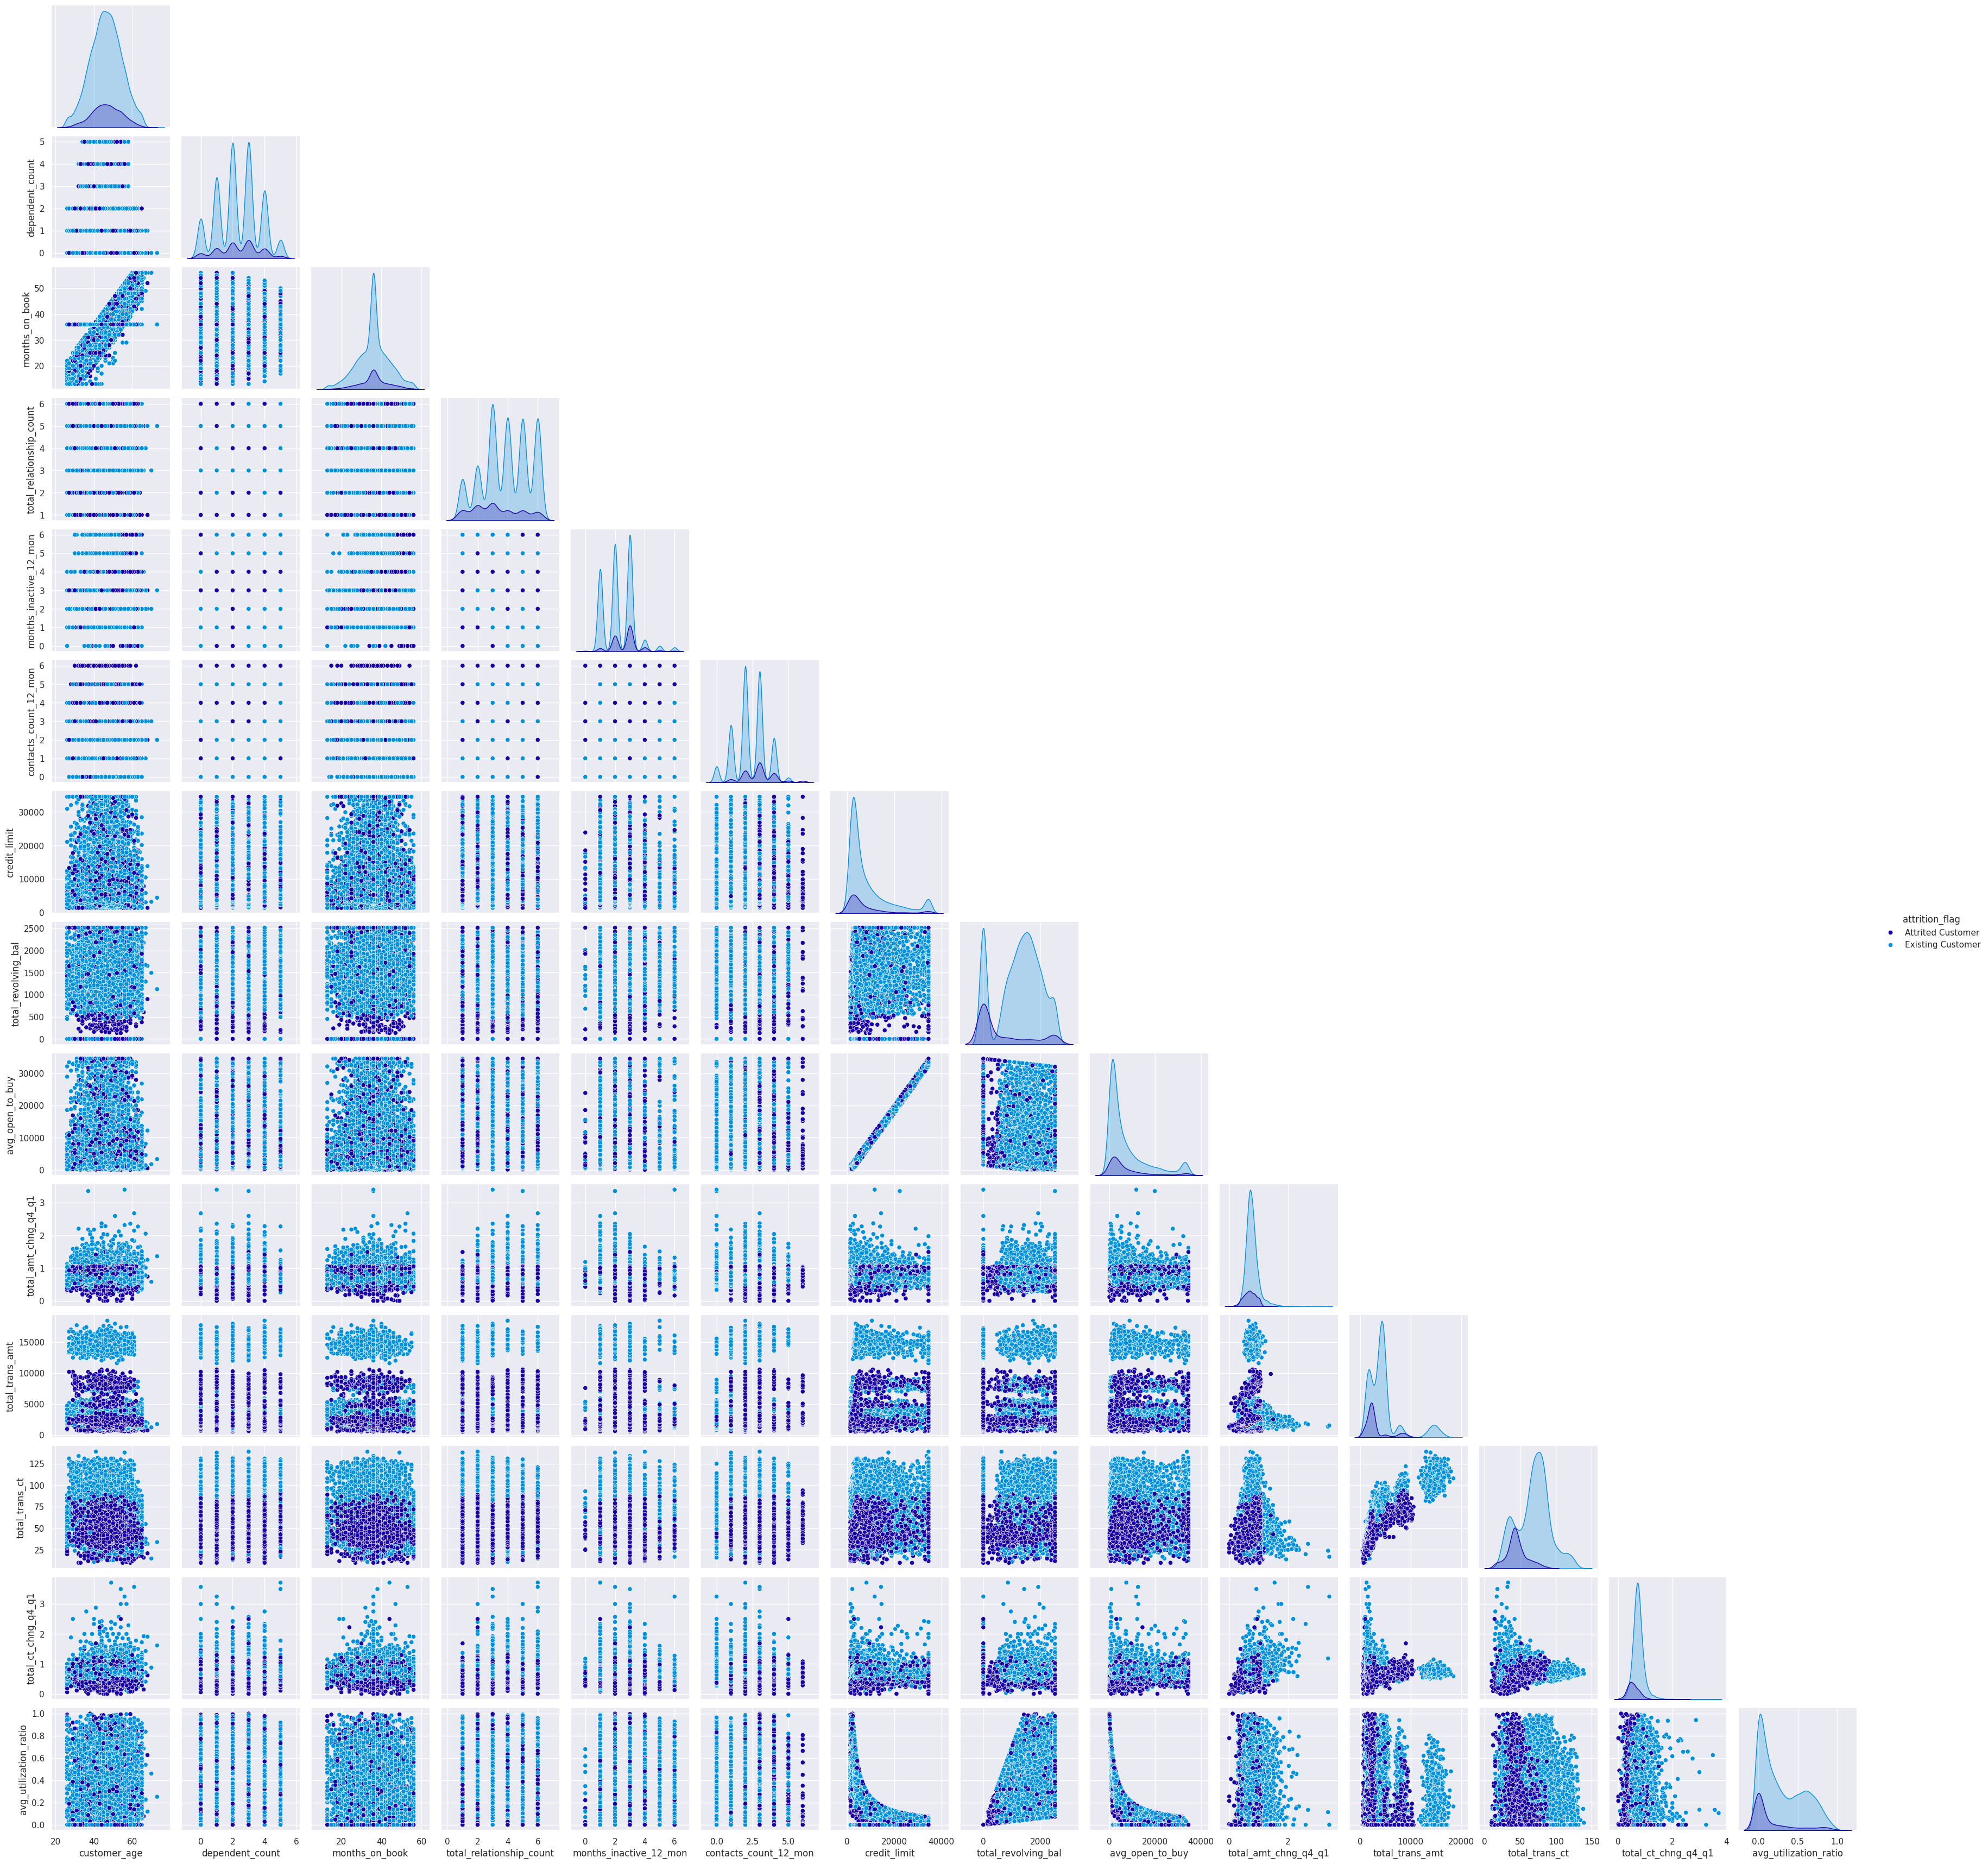

In [55]:

plt.figure(figsize=(20, 20))
sns.set(palette="nipy_spectral")
sns.pairplot(data=df, hue="attrition_flag", corner=True)

There are clusters formed with respect to attrition for the variables total revolving amount, total amount change Q4 to Q1, total transaction amount, total transaction count, total transaction count change Q4 to Q1
There are strong correlation between a few columns as well, which we'll check in below correlation heatmap.

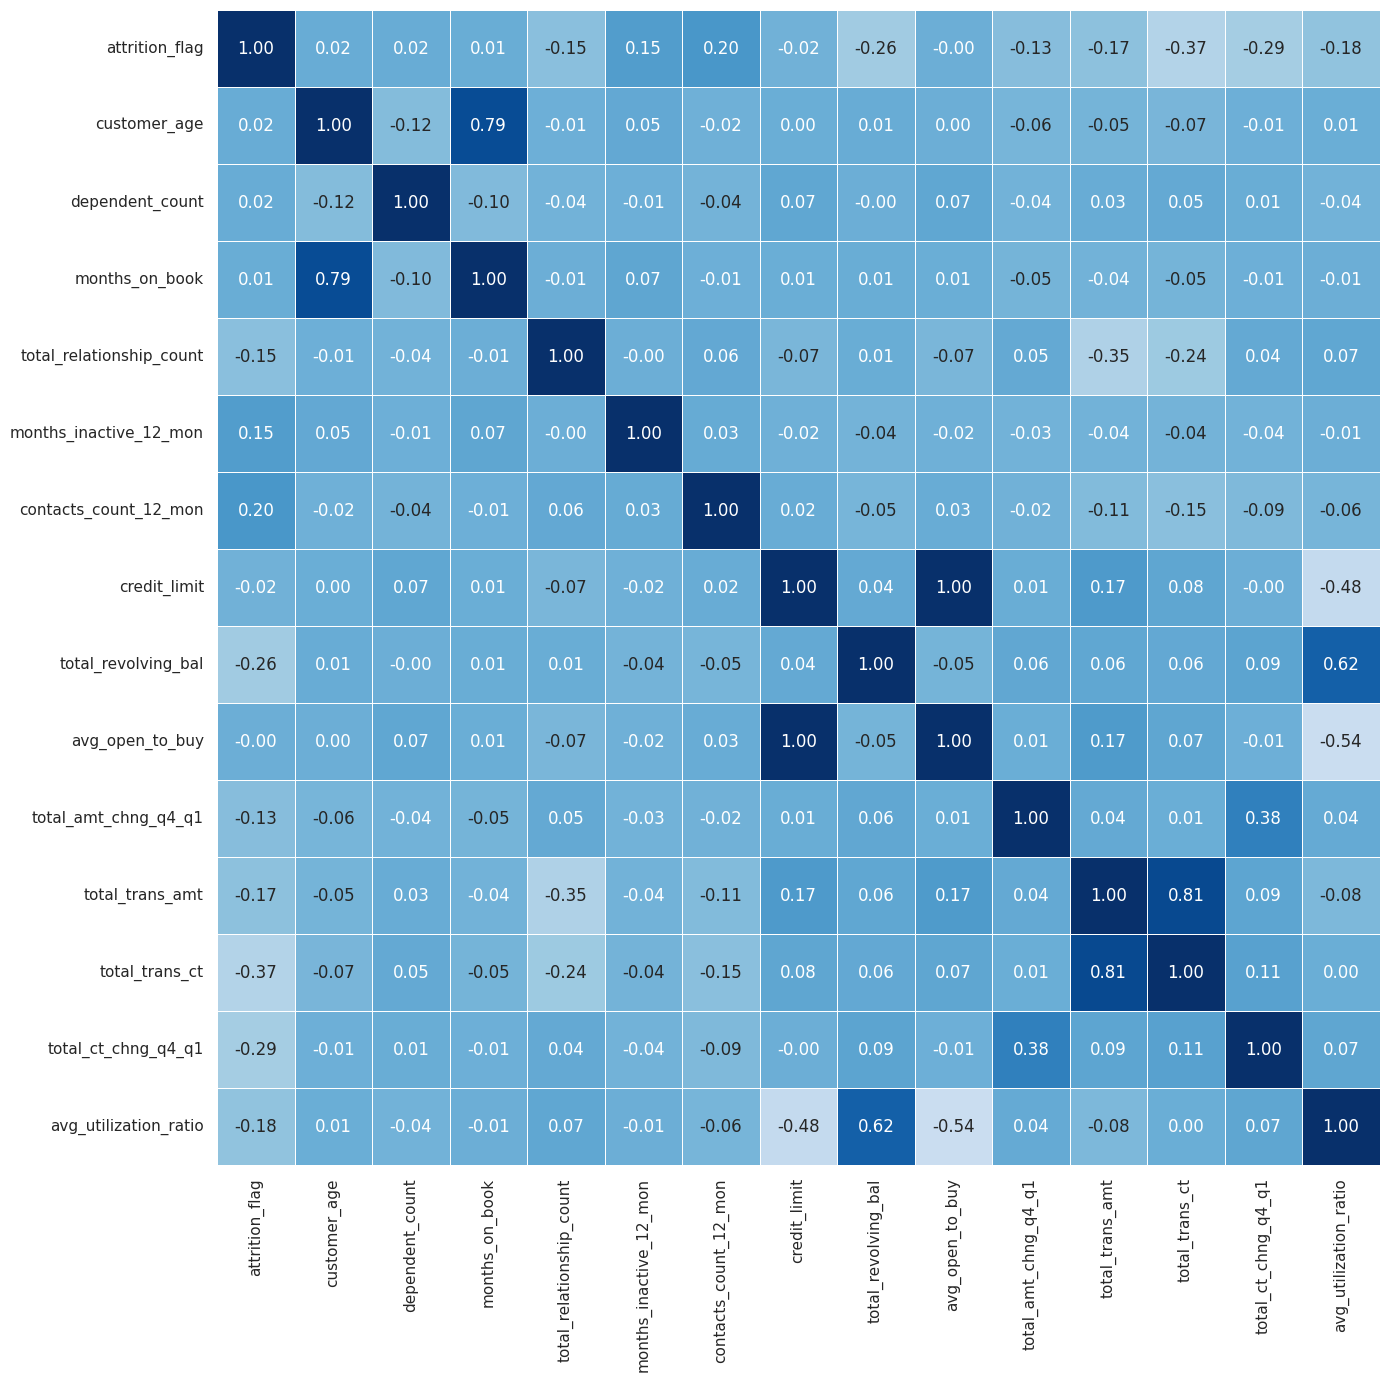

In [60]:

# Plotting correlation heatmap of the features
codes = {'Existing Customer':0, 'Attrited Customer':1}
data_clean = df.copy()
data_clean['attrition_flag'] = data_clean['attrition_flag'].map(codes).astype(int)

numeric_data_clean = data_clean.select_dtypes(include=np.number)
sns.set(rc={"figure.figsize": (15, 15)})
sns.heatmap(
    numeric_data_clean.corr(),
    annot=True,
    linewidths=0.5,
    center=0,
    cbar=False,
    cmap="Blues",
    fmt="0.2f",
)
plt.show()

Credit Limit and Average Open to Buy have 100% collinearity
Months on book and Customer Age have quite strong correlation
Average Utilization Ration and Total Revolving Balance are also a bit correlated it appears
Attrition Flag does not have highly strong correlation with any of the numeric variables
Customer Churn appears to be uncorrelated with Customer Age, Dependent Count, Months on Book, Open to Buy, Credit Limit, we'll remove these from dataset

DATA PREPROCESSING

1 Data Split into Dependent and Target sets

2 Data Split to Train, Test and Validation sets
3 Standardize feature names
4 Drop unnecessary columns (Client Number, Customer Age, 5Dependent Count, Months on Book, Open to Buy, Credit Limit)
6 Missing Value/Incorrect Value treatment
7 Encoding
8 Scaling/Outlier treatment



In [61]:
# Building a function to standardize columns

def feature_name_standardize(df: pd.DataFrame):
    df_ = df.copy()
    df_.columns = [i.replace(" ", "_").lower() for i in df_.columns]
    return df_

# Building a function to drop features

def drop_feature(df: pd.DataFrame, features: list = []):
    df_ = df.copy()
    if len(features) != 0:
        df_ = df_.drop(columns=features)

    return df_

# Building a function to treat incorrect value

def mask_value(df: pd.DataFrame, feature: str = None, value_to_mask: str = None, masked_value: str = None):
    df_ = df.copy()
    if feature != None and value_to_mask != None:
        if feature in df_.columns:
            df_[feature] = df_[feature].astype('object')
            df_.loc[df_[df_[feature] == value_to_mask].index, feature] = masked_value
            df_[feature] = df_[feature].astype('category')

    return df_

# Building a custom imputer
def impute_category_unknown(df: pd.DataFrame, fill_value: str):
    df_ = df.copy()
    for col in df_.select_dtypes(include='category').columns.tolist():
        df_[col] = df_[col].astype('object')
        df_[col] = df_[col].fillna('Unknown')
        df_[col] = df_[col].astype('category')
    return df_

# Building a custom data preprocessing class with fit and transform methods for standardizing column names

class FeatureNamesStandardizer(TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Returns dataframe with column names in lower case with underscores in place of spaces."""
        X_ = feature_name_standardize(X)
        return X_
# Building a custom data preprocessing class with fit and transform methods for dropping columns

class ColumnDropper(TransformerMixin):
    def __init__(self, features: list):
        self.features = features

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Given a list of columns, returns a dataframe without those columns."""
        X_ = drop_feature(X, features=self.features)
        return X_
# Building a custom data preprocessing class with fit and transform methods for custom value masking

class CustomValueMasker(TransformerMixin):
    def __init__(self, feature: str, value_to_mask: str, masked_value: str):
        self.feature = feature
        self.value_to_mask = value_to_mask
        self.masked_value = masked_value

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Return a dataframe with the required feature value masked as required."""
        X_ = mask_value(X, self.feature, self.value_to_mask, self.masked_value)
        return X_

# Building a custom class to one-hot encode using pandas
class PandasOneHot(TransformerMixin):
    def __init__(self, columns: list = None):
        self.columns = columns

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Return a dataframe with the required feature value masked as required."""
        X_ = pd.get_dummies(X, columns = self.columns, drop_first=True)
        return X_



# Building a custom class to fill nulls with Unknown
class FillUnknown(TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Return a dataframe with the required feature value masked as required."""
        X_ = impute_category_unknown(X, fill_value='Unknown')
        return X_




In [62]:

df = churner.copy()
df.describe(include="all").T

count unique                top  freq  \
CLIENTNUM                10127.000    NaN                NaN   NaN   
Attrition_Flag               10127      2  Existing Customer  8500   
Customer_Age             10127.000    NaN                NaN   NaN   
Gender                       10127      2                  F  5358   
Dependent_count          10127.000    NaN                NaN   NaN   
Education_Level              10127      7           Graduate  3128   
Marital_Status               10127      4            Married  4687   
Income_Category              10127      6     Less than $40K  3561   
Card_Category                10127      4               Blue  9436   
Months_on_book           10127.000    NaN                NaN   NaN   
Total_Relationship_Count 10127.000    NaN                NaN   NaN   
Months_Inactive_12_mon   10127.000    NaN                NaN   NaN   
Contacts_Count_12_mon    10127.000    NaN                NaN   NaN   
Credit_Limit             10127.000    NaN                NaN   NaN   
Total_Revolving_Bal      10127.000    NaN                NaN   NaN   
Avg_Open_To_Buy          10127.000    NaN                NaN   NaN   
Total_Amt_Chng_Q4_Q1     10127.000    NaN                NaN   NaN   
Total_Trans_Amt          10127.000    NaN                NaN   NaN   
Total_Trans_Ct           10127.000    NaN                NaN   NaN   
Total_Ct_Chng_Q4_Q1      10127.000    NaN                NaN   NaN   
Avg_Utilization_Ratio    10127.000    NaN                NaN   NaN   

                                  mean          std           min  \
CLIENTNUM                739177606.334 36903783.450 708082083.000   
Attrition_Flag                     NaN          NaN           NaN   
Customer_Age                    46.326        8.017        26.000   
Gender                             NaN          NaN           NaN   
Dependent_count                  2.346        1.299         0.000   
Education_Level                    NaN          NaN           NaN   
Marital_Status                     NaN          NaN           NaN   
Income_Category                    NaN          NaN           NaN   
Card_Category                      NaN          NaN           NaN   
Months_on_book                  35.928        7.986        13.000   
Total_Relationship_Count         3.813        1.554         1.000   
Months_Inactive_12_mon           2.341        1.011         0.000   
Contacts_Count_12_mon            2.455        1.106         0.000   
Credit_Limit                  8631.954     9088.777      1438.300   
Total_Revolving_Bal           1162.814      814.987         0.000   
Avg_Open_To_Buy               7469.140     9090.685         3.000   
Total_Amt_Chng_Q4_Q1             0.760        0.219         0.000   
Total_Trans_Amt               4404.086     3397.129       510.000   
Total_Trans_Ct                  64.859       23.473        10.000   
Total_Ct_Chng_Q4_Q1              0.712        0.238         0.000   
Avg_Utilization_Ratio            0.275        0.276         0.000   

                                   25%           50%           75%  \
CLIENTNUM                713036770.500 717926358.000 773143533.000   
Attrition_Flag                     NaN           NaN           NaN   
Customer_Age                    41.000        46.000        52.000   
Gender                             NaN           NaN           NaN   
Dependent_count                  1.000         2.000         3.000   
Education_Level                    NaN           NaN           NaN   
Marital_Status                     NaN           NaN           NaN   
Income_Category                    NaN           NaN           NaN   
Card_Category                      NaN           NaN           NaN   
Months_on_book                  31.000        36.000        40.000   
Total_Relationship_Count         3.000         4.000         5.000   
Months_Inactive_12_mon           2.000         2.000         3.000   
Contacts_Count_12_mon            2.000         2.000       

In [63]:

# For dropping columns
columns_to_drop = [
    "clientnum",
    "credit_limit",
    "dependent_count",
    "months_on_book",
    "avg_open_to_buy",
    "customer_age",
]

# For masking a particular value in a feature
column_to_mask_value = "income_category"
value_to_mask = "abc"
masked_value = "Unknown"

# Random state and loss
seed = 1
loss_func = "logloss"

# Test and Validation sizes
test_size = 0.2
val_size = 0.25

# Dependent Varibale Value map
target_mapper = {"Attrited Customer": 1, "Existing Customer": 0}

In [64]:
cat_columns = df.select_dtypes(include="object").columns.tolist()
df[cat_columns] = df[cat_columns].astype("category")

In [65]:
X = df.drop(columns=["Attrition_Flag"])
y = df["Attrition_Flag"].map(target_mapper)

In [66]:

# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=test_size, random_state=seed, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=val_size, random_state=seed, stratify=y_temp
)
print(
    "Training data shape: \n\n",
    X_train.shape,
    "\n\nValidation Data Shape: \n\n",
    X_val.shape,
    "\n\nTesting Data Shape: \n\n",
    X_test.shape,
)

Training data shape: 

 (6075, 20) 

Validation Data Shape: 

 (2026, 20) 

Testing Data Shape: 

 (2026, 20)


In [67]:

X_train.head()

CLIENTNUM  Customer_Age Gender  Dependent_count Education_Level  \
800   794498733            40      M                2         Unknown   
498   772735758            44      M                1         Unknown   
4356  713856708            48      M                4     High School   
407   709311633            41      M                2        Graduate   
8728  712453308            46      M                4     High School   

     Marital_Status Income_Category Card_Category  Months_on_book  \
800          Single         $120K +          Blue              21   
498         Married         Unknown          Blue              34   
4356        Married    $80K - $120K          Blue              36   
407         Unknown     $60K - $80K        Silver              36   
8728       Divorced     $40K - $60K        Silver              36   

      Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
800                          6                       4                      3   
498                          6                       2                      0   
4356                         5                       1                      2   
407                          6                       2                      0   
8728                         2                       2                      3   

      Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
800      20056.000                 1602        18454.000   
498       2885.000                 1895          990.000   
4356      6798.000                 2517         4281.000   
407      27000.000                    0        27000.000   
8728     15034.000                 1356        13678.000   

      Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
800                  0.466             1687              46   
498                  0.387             1366              31   
4356                 0.873             4327              79   
407                  0.610             1209              39   
8728                 0.754             7737              84   

      Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
800                 0.533                  0.080  
498                 0.632                  0.657  
4356                0.881                  0.370  
407                 0.300                  0.000  
8728                0.750                  0.090

In [68]:
print("Training: \n", y_train.value_counts(normalize=True))
print("\n\nValidation: \n", y_val.value_counts(normalize=True))
print("\n\nTest: \n", y_test.value_counts(normalize=True))


Training: 
 Attrition_Flag
0   0.839
1   0.161
Name: proportion, dtype: float64


Validation: 
 Attrition_Flag
0   0.839
1   0.161
Name: proportion, dtype: float64


Test: 
 Attrition_Flag
0   0.840
1   0.160
Name: proportion, dtype: float64


DATA PREPROCESSING

Data pre-processing is one of the the most important parts of the job before starting to train the model with the dataset. We need to impute missing values, fix any illogical data value in columns, convert category columns to numeric (either ordinal, or binary using one-hot encoding), scale the data to deal with the distribution skewness and outliers, before feeding the data to a model.  

We are using the pre-available transformation classes and the custom classes that we created to first fit the training data and then transform the train, validation and test dataset. This is the standard logical practice to keep the influence of test and validation data in the train dataset to prevent/avoid data leakage while training or validating the model.

In [69]:
# To Standardize feature names
feature_name_standardizer = FeatureNamesStandardizer()

X_train = feature_name_standardizer.fit_transform(X_train)
X_val = feature_name_standardizer.transform(X_val)
X_test = feature_name_standardizer.transform(X_test)

# To Drop unnecessary columns
column_dropper = ColumnDropper(features=columns_to_drop)

X_train = column_dropper.fit_transform(X_train)
X_val = column_dropper.transform(X_val)
X_test = column_dropper.transform(X_test)

# To Mask incorrect/meaningless value of a feature
value_masker = CustomValueMasker(
    feature=column_to_mask_value, value_to_mask=value_to_mask, masked_value=masked_value
)

X_train = value_masker.fit_transform(X_train)
X_val = value_masker.transform(X_val)
X_test = value_masker.transform(X_test)

# To impute categorical Nulls to Unknown
cat_columns = X_train.select_dtypes(include="category").columns.tolist()
imputer = FillUnknown()

X_train[cat_columns] = imputer.fit_transform(X_train[cat_columns])
X_val[cat_columns] = imputer.transform(X_val[cat_columns])
X_test[cat_columns] = imputer.transform(X_test[cat_columns])
# To encode the data
one_hot = PandasOneHot()

X_train = one_hot.fit_transform(X_train)
X_val = one_hot.transform(X_val)
X_test = one_hot.transform(X_test)


# Scale the numerical columns
robust_scaler = RobustScaler(with_centering=False, with_scaling=True)
num_columns = [
    "total_relationship_count",
    "months_inactive_12_mon",
    "contacts_count_12_mon",
    "total_revolving_bal",
    "total_amt_chng_q4_q1",
    "total_trans_amt",
    "total_trans_ct",
    "total_ct_chng_q4_q1",
    "avg_utilization_ratio",
]

X_train[num_columns] = pd.DataFrame(
    robust_scaler.fit_transform(X_train[num_columns]),
    columns=num_columns,
    index=X_train.index,
)
X_val[num_columns] = pd.DataFrame(
    robust_scaler.transform(X_val[num_columns]), columns=num_columns, index=X_val.index
)
X_test[num_columns] = pd.DataFrame(
    robust_scaler.transform(X_test[num_columns]),
    columns=num_columns,
    index=X_test.index,
)

In [70]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = 3*cm.max()/4
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [71]:

def Evaluate_Performance(Model, Xtrain, Xtest, Ytrain, Ytest) :
    Model.fit(Xtrain,Ytrain)
    overall_score = cross_val_score(Model, Xtrain,Ytrain, cv=10)
    model_score = np.average(overall_score)
    Ypredicted = Model.predict(Xtest)
    print("\n • Training Accuracy Score : ", round(Model.score(Xtrain, Ytrain) * 100,2))
    print(f" • Cross Validation Score : {round(model_score * 100,2)}")
    print(colored(" ❖ Testing Accuracy Score : ", attrs=['bold']),
          colored(f"{round(accuracy_score(Ytest, Ypredicted) * 100,2)}", color='black', attrs=['bold']))
    print(' • Precision Score is :', round(precision_score(Ytest, Ypredicted) * 100,2))
    print(' • Recall Score is :', round(recall_score(Ytest, Ypredicted) * 100,2))
    print(' • F1-Score Score is :', round(f1_score(Ytest, Ypredicted) * 100,2))
    print('-'*80)
    conf_matrix = confusion_matrix(Ytest,Ypredicted)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues, annot_kws={"size": 16})
    plt.title('Predicted Labels',y = 1.05, fontsize=20)
    plt.ylabel('True Labels', labelpad=25, fontsize=20)
    plt.show()
    print('-'*80)

In [72]:

X_train.shape


(6075, 27)

In [73]:

print(
    "Training data shape: \n\n",
    X_train.shape,
    "\n\nValidation Data Shape: \n\n",
    X_val.shape,
    "\n\nTesting Data Shape: \n\n",
    X_test.shape,
)

Training data shape: 

 (6075, 27) 

Validation Data Shape: 

 (2026, 27) 

Testing Data Shape: 

 (2026, 27)


In [74]:

X_test.shape

(2026, 27)

Model Building

We are building 8 models here, Logistic Regression, LDA, QDA, Decision Tree Random Forest.

In [75]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from termcolor import colored

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from termcolor import colored
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, roc_curve, auc


In [76]:
def get_metrics_score(
    model, train, test, train_y, test_y, threshold=0.5, flag=False, roc=True
):
    """
    Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    model: classifier to predict values of X
    train, test: Independent features
    train_y,test_y: Dependent variable
    threshold: thresold for classifiying the observation as 1
    flag: If the flag is set to True then only the print statements showing different will be displayed. The default value is set to True.
    roc: If the roc is set to True then only roc score will be displayed. The default value is set to False.
    """
    # defining an empty list to store train and test results

    score_list = []

    pred_train = model.predict_proba(train)[:, 1] > threshold
    pred_test = model.predict_proba(test)[:, 1] > threshold

    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)

    train_acc = accuracy_score(pred_train, train_y)
    test_acc = accuracy_score(pred_test, test_y)

    train_recall = recall_score(train_y, pred_train)
    test_recall = recall_score(test_y, pred_test)

    train_precision = precision_score(train_y, pred_train)
    test_precision = precision_score(test_y, pred_test)

    train_f1 = f1_score(train_y, pred_train)
    test_f1 = f1_score(test_y, pred_test)

    pred_train_proba = model.predict_proba(train)[:, 1]
    pred_test_proba = model.predict_proba(test)[:, 1]

    train_roc_auc = roc_auc_score(train_y, pred_train_proba)
    test_roc_auc = roc_auc_score(test_y, pred_test_proba)

    score_list.extend(
        (
            train_acc,
            test_acc,
            train_recall,
            test_recall,
            train_precision,
            test_precision,
            train_f1,
            test_f1,
            train_roc_auc,
            test_roc_auc,
        )
    )

    if flag == True:

        print("Accuracy on training set : ", accuracy_score(pred_train, train_y))
        print("Accuracy on test set : ", accuracy_score(pred_test, test_y))
        print("Recall on training set : ", recall_score(train_y, pred_train))
        print("Recall on test set : ", recall_score(test_y, pred_test))
        print("Precision on training set : ", precision_score(train_y, pred_train))
        print("Precision on test set : ", precision_score(test_y, pred_test))
        print("F1 on training set : ", f1_score(train_y, pred_train))
        print("F1 on test set : ", f1_score(test_y, pred_test))

    if roc == True:
        if flag == True:
            print(
                "ROC-AUC Score on training set : ",
                roc_auc_score(train_y, pred_train_proba),
            )
            print(
                "ROC-AUC Score on test set : ", roc_auc_score(test_y, pred_test_proba)
            )

    return score_list  # returning the list with train and test scores

In [77]:

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming Evaluate_Performance function calculates the AUC-ROC score
def Evaluate_Performance_AUC(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict_proba(X_train)[:, 1]
    y_test_pred = model.predict_proba(X_test)[:, 1]

    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)
    roc_auc_train = auc(fpr_train, tpr_train)

    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
    roc_auc_test = auc(fpr_test, tpr_test)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='Train ROC curve (area = {:.2f})'.format(roc_auc_train))
    plt.plot(fpr_test, tpr_test, color='blue', lw=2, label='Test ROC curve (area = {:.2f})'.format(roc_auc_test))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

In [78]:
def make_confusion_matrix(model, test_X, y_actual, labels=[1, 0]):
    """
    model : classifier to predict values of X
    test_X: test set
    y_actual : ground truth

    """
    y_predict = model.predict(test_X)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[1, 0])
    df_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - Attrited", "Actual - Existing"]],
        columns=[i for i in ["Predicted - Attrited", "Predicted - Existing"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(5, 3))
    sns.heatmap(df_cm, annot=labels, fmt="", cmap="Blues").set(title="Confusion Matrix")

In [79]:
# # defining empty lists to add train and test results

model_names = []
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []
roc_auc_train = []
roc_auc_test = []
cross_val_train = []


def add_score_model(model_name, score, cv_res):
    """Add scores to list so that we can compare all models score together"""
    model_names.append(model_name)
    acc_train.append(score[0])
    acc_test.append(score[1])
    recall_train.append(score[2])
    recall_test.append(score[3])
    precision_train.append(score[4])
    precision_test.append(score[5])
    f1_train.append(score[6])
    f1_test.append(score[7])
    roc_auc_train.append(score[8])
    roc_auc_test.append(score[9])
    cross_val_train.append(cv_res)



In [80]:
from sklearn.neighbors import KNeighborsClassifier
models = []  # Empty list to store all the models
cv_results = []

# Appending models into the list
models.append(("KNN", KNeighborsClassifier()))
models.append(("logistic regression", LogisticRegression(random_state=seed)))
models.append(("Random forest", RandomForestClassifier(random_state=seed)))
#models.append(("GBM", GradientBoostingClassifier(random_state=seed)))
#models.append(("Adaboost", AdaBoostClassifier(random_state=seed)))
#models.append(("Xgboost", XGBClassifier(random_state=seed, eval_metric=loss_func)))
models.append(("dtree", DecisionTreeClassifier(random_state=seed)))
#models.append(("Light GBM", lgb.LGBMClassifier(random_state=seed)))

# For each model, run cross validation on 9 folds (+ 1 validation fold) with scoring for recall
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=10, shuffle=True, random_state=1
    )  # Setting number of splits equal to 10

    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    cv_results.append(cv_result)

    model.fit(X_train, y_train)
    model_score = get_metrics_score(model, X_train, X_val, y_train, y_val)
    add_score_model(name, model_score, cv_result.mean())

print("Operation Completed!")


Operation Completed!


Model Tuning Using Randomized SearchCV

Typically a hyperparameter has a known effect on a model in the general sense, but it is not clear how to best set a hyperparameter for a given dataset. Further, many machine learning models have a range of hyperparameters and they may interact in nonlinear ways.

As such, it is often required to search for a set of hyperparameters that result in the best performance of a model on a dataset. This is called hyperparameter optimization, hyperparameter tuning, or hyperparameter search.

An optimization procedure involves defining a search space. This can be thought of geometrically as an n-dimensional volume, where each hyperparameter represents a different dimension and the scale of the dimension are the values that the hyperparameter may take on, such as real-valued, integer-valued, or categorical.

Search Space: Volume to be searched where each dimension represents a hyperparameter and each point represents one model configuration. A point in the search space is a vector with a specific value for each hyperparameter value. The goal of the optimization procedure is to find a vector that results in the best performance of the model after learning, such as maximum accuracy or minimum error.

A range of different optimization algorithms may be used, although two of the simplest and most common methods are random search and grid search.

Random Search: Define a search space as a bounded domain of hyperparameter values and randomly sample points in that domain.  

Grid Search: Define a search space as a grid of hyperparameter values and evaluate every position in the grid.

On Unbalanced data

Logistic Regression

In [81]:

lr_tuned_model =LogisticRegression(max_iter=1000, random_state=42)  # Set max_iter for convergence

# Define the hyperparameters and their ranges to search
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization type
    'C': [0.001, 0.01, 0.1, 1, 10, 100]  # Inverse of regularization strength
    # Add other parameters and their ranges
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=lr_tuned_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Retrain the model using the best parameters
lr_tuned_model = grid_search.best_estimator_
lr_tuned_model.fit(X_train, y_train)

Best parameters: {'C': 1, 'penalty': 'l2'}
Best score: 0.8994238683127571


LogisticRegression(C=1, max_iter=1000, random_state=42)

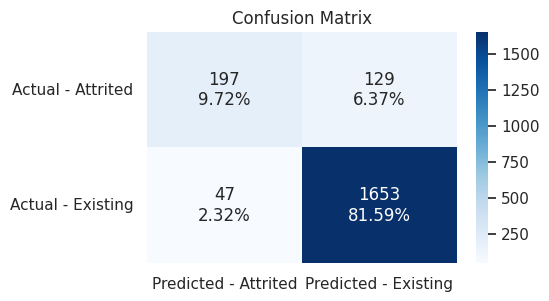

In [82]:

make_confusion_matrix(lr_tuned_model, X_val, y_val)

KNN

In [83]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn_tuned_model = KNeighborsClassifier()

# Define the hyperparameters and their ranges to search
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Vary the number of neighbors
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # For Minkowski distance (p=1 for Manhattan, p=2 for Euclidean)
    # Add other parameters and their ranges
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=knn_tuned_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Retrain the model using the best parameters
best_knn = grid_search.best_estimator_
best_knn.fit(X_train, y_train)

Best parameters: {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
Best score: 0.9035390946502057


KNeighborsClassifier(n_neighbors=7, p=1)

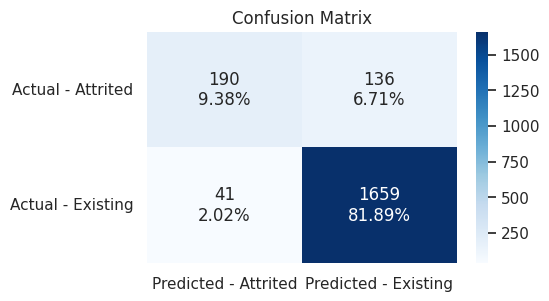

In [84]:

make_confusion_matrix(best_knn, X_val, y_val)

LDA & QDA

PCA of X_train

In [85]:

x1=X_train

In [86]:

y1=y_train

In [87]:
from sklearn.decomposition import PCA
import numpy as np

# Assuming 'X1' is your dataset containing 20 features

# Initialize PCA with 2 components
pca = PCA(n_components=2)

# Fit and transform your data
X1_pca = pca.fit_transform(x1)

# Get the variance explained by each principal component
explained_variance = pca.explained_variance_ratio_

# Get cumulative explained variance for the first two components
cumulative_explained_variance = np.cumsum(explained_variance)

print("Variance explained by each component:", explained_variance)
print("Cumulative variance explained by the first two components:", cumulative_explained_variance)

Variance explained by each component: [0.21977659 0.13854499]
Cumulative variance explained by the first two components: [0.21977659 0.35832158]


In [88]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt


pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(x1)
X_test_pca = pca.transform(X_val)

clf_lda = LinearDiscriminantAnalysis()
clf_lda.fit(X_train_pca,y1)
y_pred = clf_lda.predict(X_test_pca)
y_fit =  clf_lda.predict(X_train_pca)

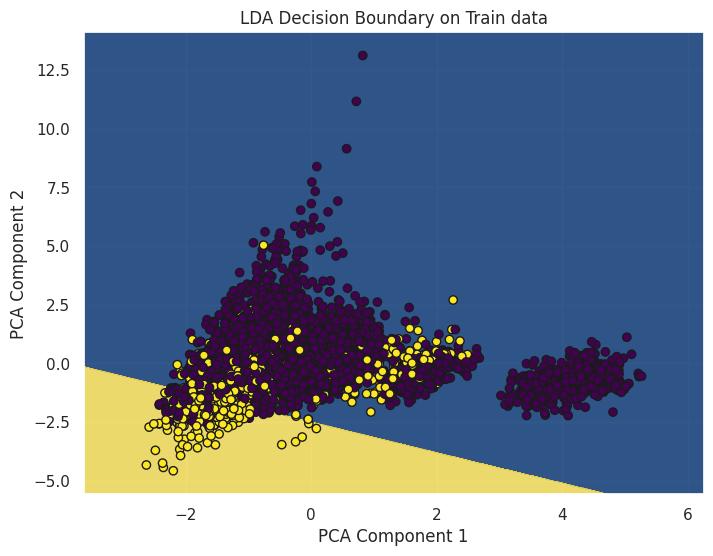

In [89]:
# Assuming clf_lda is already trained

# Define a meshgrid for the 2D feature space
h = .02  # Step size in the mesh
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Get predicted labels for each point in the meshgrid
Z = clf_lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap='cividis', alpha=0.8)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', edgecolors='k', label='Train Data')
plt.title('LDA Decision Boundary on Train data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


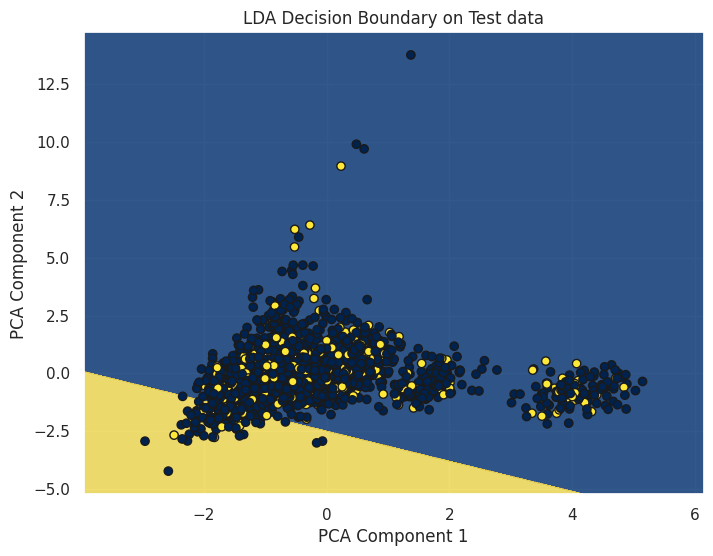

In [90]:
# Assuming clf_lda is already trained

# Define a meshgrid for the 2D feature space
h = .02  # Step size in the mesh
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Get predicted labels for each point in the meshgrid
Z = clf_lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap='cividis', alpha=0.8)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='cividis', edgecolors='k', label='Train Data')
plt.title('LDA Decision Boundary on Test data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [91]:

from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming y_val is the true labels for the validation set

# Calculate accuracy scores
accuracy_test = accuracy_score(y_val, y_pred)
accuracy_train = accuracy_score(y1, y_fit)

# Print accuracy scores
print(f"Accuracy score on the test set: {accuracy_test:.2f}")
print(f"Accuracy score on the training set: {accuracy_train:.2f}")

# Create confusion matrices
cm_test = confusion_matrix(y_val, y_pred)
cm_train = confusion_matrix(y1, y_fit)

# Print confusion matrices
print("Confusion Matrix for Test Data:")
print(cm_test)
print("\nConfusion Matrix for Training Data:")
print(cm_train)


Accuracy score on the test set: 0.86
Accuracy score on the training set: 0.86
Confusion Matrix for Test Data:
[[1665   35]
 [ 253   73]]

Confusion Matrix for Training Data:
[[4992  107]
 [ 762  214]]


QDA

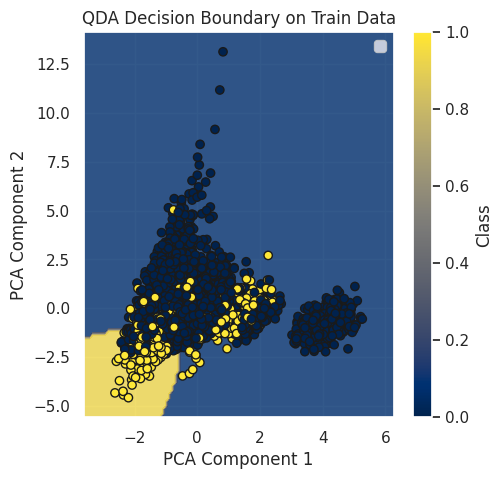

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import matplotlib.pyplot as plt

# Step 1: Train-Test Split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Scaling
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

# Step 3: Apply PCA for 2 components
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(x1)
X_test_pca = pca.transform(X_val)

# Step 4: Fit Quadratic Discriminant Analysis (QDA)
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train_pca, y_train)

# Step 5: Plot the Results
plt.figure(figsize=(5, 5))

# Plot decision regions
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = qda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap='cividis')

# Scatter plot of training data
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolors='k', cmap='cividis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('QDA Decision Boundary on Train Data')
plt.colorbar(label='Class')
plt.legend()
plt.show()

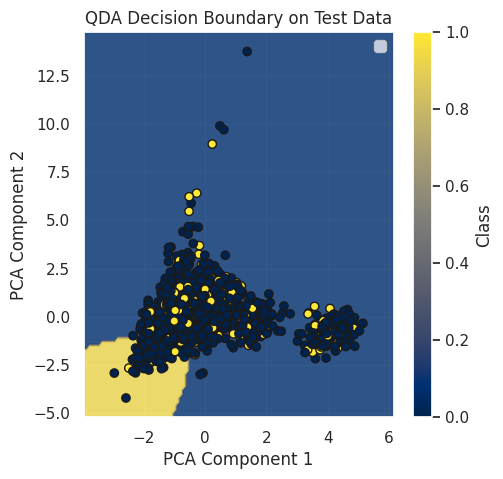

In [93]:

# Step 5: Plot the Results
plt.figure(figsize=(5,5))

# Plot decision regions
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = qda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap='cividis')

# Scatter plot of training data
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, edgecolors='k', cmap='cividis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('QDA Decision Boundary on Test Data')
plt.colorbar(label='Class')
plt.legend()
plt.show()

DT

In [94]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Define the Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Define the hyperparameters and their ranges to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    # Add other parameters and their ranges
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Retrain the model using the best parameters
best_dt = grid_search.best_estimator_
best_dt.fit(X_train, y_train)

# Plot the decision tree with the best parameters


Best parameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best score: 0.9354732510288066


DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=4,
                       random_state=42)

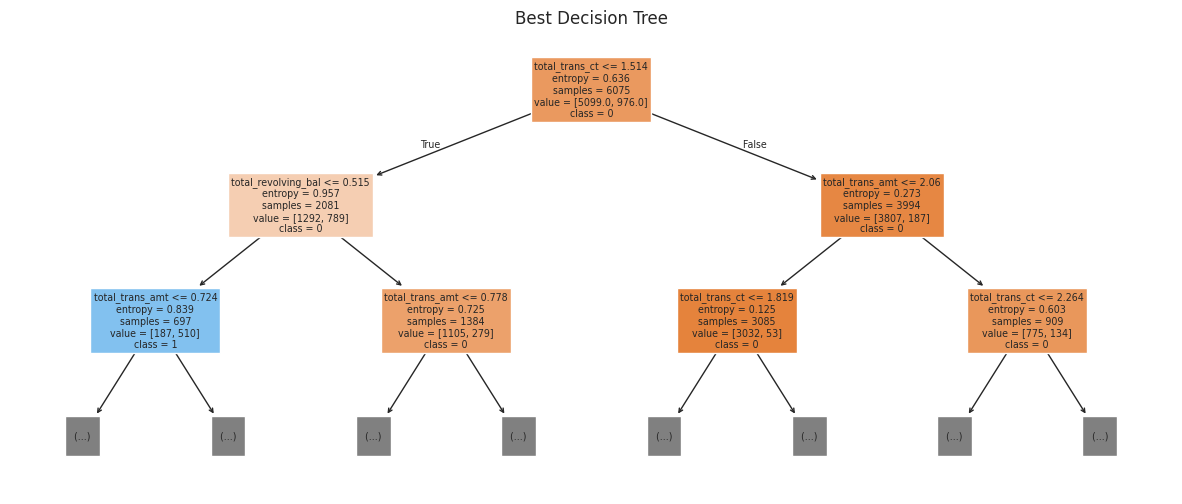

In [95]:

plt.figure(figsize=(15, 6))
plot_tree(best_dt, max_depth=2, filled=True, feature_names=X_train.columns, class_names=['0', '1'])
plt.title("Best Decision Tree")
plt.show()

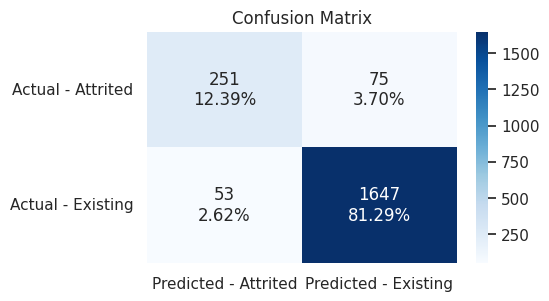

In [96]:

make_confusion_matrix(best_dt, X_val, y_val)

Random Forest

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best score: 0.9499588477366256


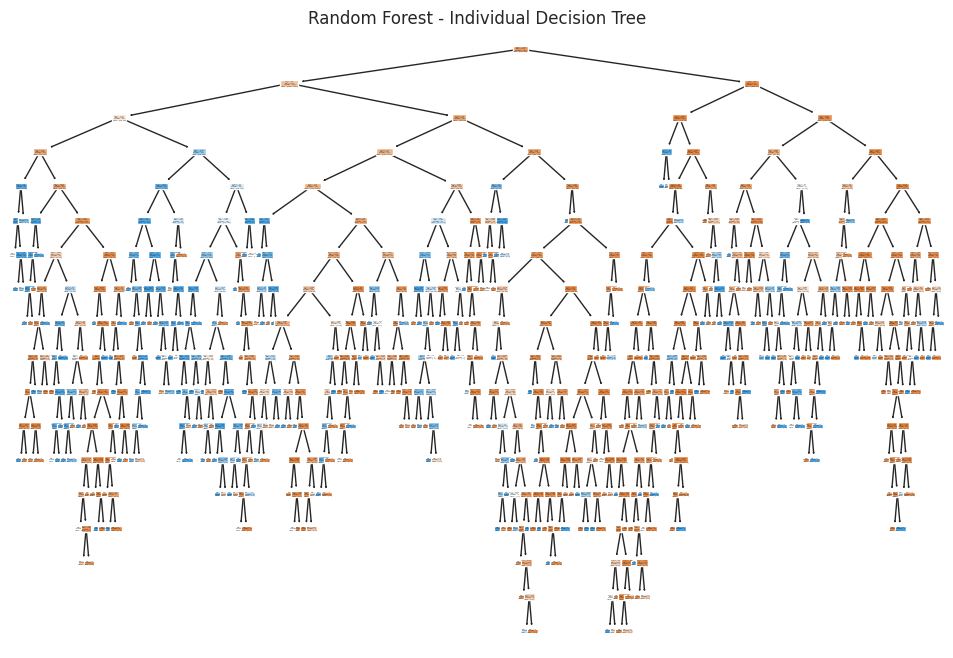

In [97]:
from sklearn.datasets import make_classification
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


# Define the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameters and their ranges to search
param_grid = {
    'n_estimators': [100, 200 ],
    'max_depth': [None, 5, 7 ],
    'min_samples_split': [2, 5,],
    'min_samples_leaf': [1, 2]
    # Add other parameters and their ranges
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Retrain the model using the best parameters
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)
# Plotting an individual tree from the Random Forest
# Let's say you want to plot the first tree (index 0)
plt.figure(figsize=(12, 8))
plot_tree(best_rf.estimators_[0], filled=True)
plt.title("Random Forest - Individual Decision Tree")
plt.show()

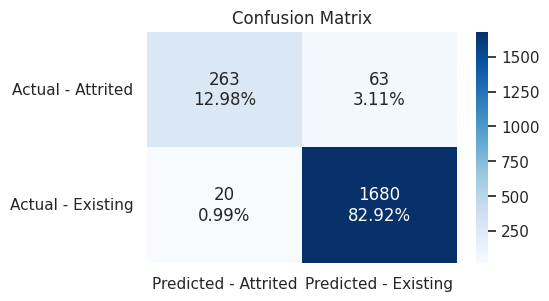

In [98]:
make_confusion_matrix(best_rf, X_val, y_val)

**Oversampling train data using SMOTE**

Our dataset has a huge imbalance in target variable labels. To deal with such datasets, we have a few tricks up our sleeves, which we call Imbalanced Classification.

Imbalanced classification involves developing predictive models on classification datasets that have a severe class imbalance.

The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on the minority class, although typically it is performance on the minority class that is most important, which is the case in our study here.

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short.

In [99]:
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy="minority", k_neighbors=10, random_state=seed
)  # Synthetic Minority Over Sampling Technique

X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After UpSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After UpSampling, the shape of train_y: {} \n".format(y_train_over.shape))


Before UpSampling, counts of label 'Yes': 976
Before UpSampling, counts of label 'No': 5099 

After UpSampling, counts of label 'Yes': 5099
After UpSampling, counts of label 'No': 5099 

After UpSampling, the shape of train_X: (10198, 27)
After UpSampling, the shape of train_y: (10198,) 



**Build Models with Oversampled Data**

Build Models with Oversampled Data

In [100]:
models_over = []

# Appending models into the list

models_over.append(("Bagging UpSampling", BaggingClassifier(random_state=seed)))
models_over.append(
    ("Random forest UpSampling", RandomForestClassifier(random_state=seed))
)
#models_over.append(("GBM UpSampling", GradientBoostingClassifier(random_state=seed)))
models_over.append(("Logistic Regression UpSampling", LogisticRegression(random_state=seed)))
#models_over.append(("Xgboost UpSampling", XGBClassifier(random_state=seed, eval_metric=loss_func)))
models_over.append(("dtree UpSampling", DecisionTreeClassifier(random_state=seed)))
#models_over.append(("Light GBM UpSampling", lgb.LGBMClassifier(random_state=seed)))

for name, model in models_over:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=10, shuffle=True, random_state=1
    )  # Setting number of splits equal to 10

    cv_result_over = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
    )
    cv_results.append(cv_result_over)

    model.fit(X_train_over, y_train_over)
    model_score_over = get_metrics_score(
        model, X_train_over, X_val, y_train_over, y_val
    )
    add_score_model(name, model_score_over, cv_result_over.mean())

print("Operation Completed!")

Operation Completed!


Comparing Models

In [101]:

lr_tuned_model_smote =LogisticRegression(max_iter=1000, random_state=42)  # Set max_iter for convergence

# Define the hyperparameters and their ranges to search
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization type
    'C': [0.001, 0.01, 0.1, 1, 10, 100]  # Inverse of regularization strength
    # Add other parameters and their ranges
}

# Use GridSearchCV to find the best parameters
grid_search_over = GridSearchCV(estimator=lr_tuned_model_smote, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_over.fit(X_train_over, y_train_over)
print("Best parameters:", grid_search_over.best_params_)
print("Best score:", grid_search_over.best_score_)

# Retrain the model using the best parameters
lr_tuned_model_smote = grid_search_over.best_estimator_
lr_tuned_model_smote.fit(X_train_over, y_train_over)

Best parameters: {'C': 0.1, 'penalty': 'l2'}
Best score: 0.8835100347152103


LogisticRegression(C=0.1, max_iter=1000, random_state=42)

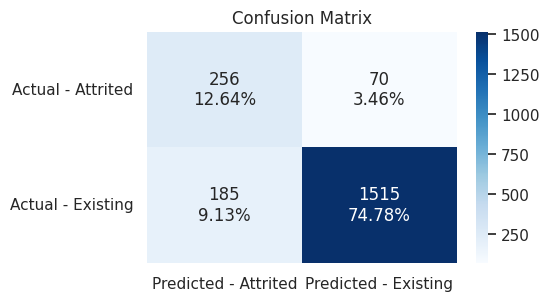

In [102]:

make_confusion_matrix(lr_tuned_model_smote, X_val, y_val)

In [103]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn_tuned_model_smote = KNeighborsClassifier()

# Define the hyperparameters and their ranges to search
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Vary the number of neighbors
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # For Minkowski distance (p=1 for Manhattan, p=2 for Euclidean)
    # Add other parameters and their ranges
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=knn_tuned_model_smote, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_over, y_train_over)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Retrain the model using the best parameters
best_knn_smote = grid_search.best_estimator_
best_knn_smote.fit(X_train_over, y_train_over)


Best parameters: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Best score: 0.9527352412274375


KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')

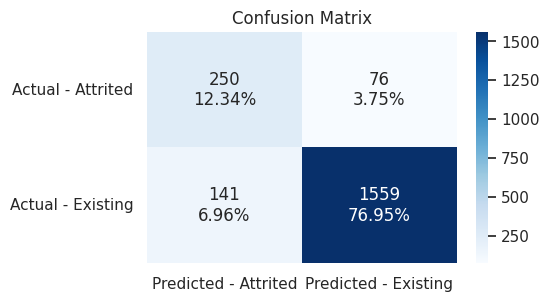

In [104]:

make_confusion_matrix(best_knn_smote, X_val, y_val)

LDA and QDA

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt


pca = PCA(n_components=2)
X_train_pca1 = pca.fit_transform(X_train_over)
X_test_pca1 = pca.transform(X_val)

clf_lda = LinearDiscriminantAnalysis()
clf_lda.fit(X_train_pca1,y_train_over)
y_pred_s = clf_lda.predict(X_test_pca)
y_fit_s =  clf_lda.predict(X_train_pca1)

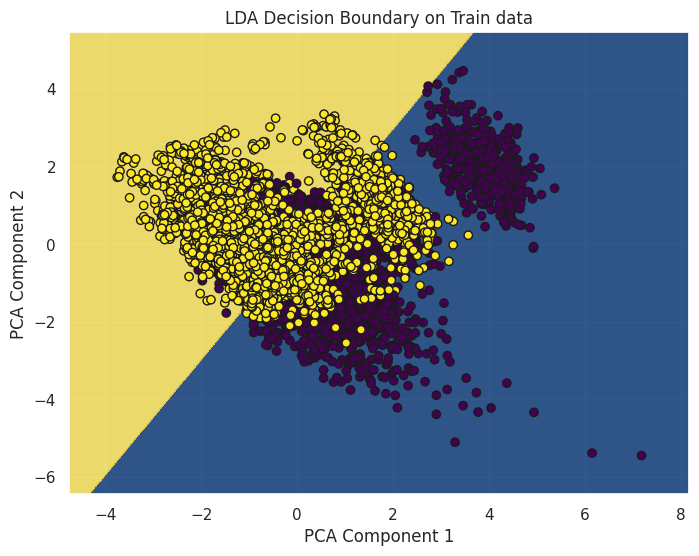

In [106]:

# Assuming clf_lda is already trained

# Define a meshgrid for the 2D feature space
h = .02  # Step size in the mesh
x_min, x_max = X_train_pca1[:, 0].min() - 1, X_train_pca1[:, 0].max() + 1
y_min, y_max = X_train_pca1[:, 1].min() - 1, X_train_pca1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Get predicted labels for each point in the meshgrid
Z = clf_lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap='cividis', alpha=0.8)
plt.scatter(X_train_pca1[:, 0], X_train_pca1[:, 1], c=y_train_over, cmap='viridis', edgecolors='k', label='Train Data')
plt.title('LDA Decision Boundary on Train data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


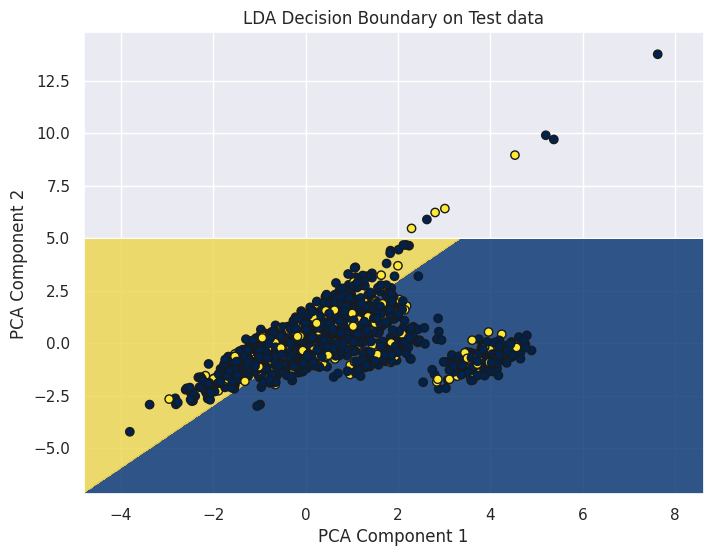

In [107]:

# Assuming clf_lda is already trained

# Define a meshgrid for the 2D feature space
h = .02  # Step size in the mesh
x_min, x_max = X_test_pca1[:, 0].min() - 1, X_test_pca1[:, 0].max() + 1
y_min, y_max = X_test_pca1[:, 1].min() - 1, X_test_pca1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Get predicted labels for each point in the meshgrid
Z = clf_lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap='cividis', alpha=0.8)
plt.scatter(X_test_pca1[:, 0], X_test_pca[:, 1], c=y_test, cmap='cividis', edgecolors='k', label='Train Data')
plt.title('LDA Decision Boundary on Test data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [108]:

from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming y_val is the true labels for the validation set

# Calculate accuracy scores
accuracy_test = accuracy_score(y_val, y_pred_s)
accuracy_train = accuracy_score(y_train_over, y_fit_s)

# Print accuracy scores
print(f"Accuracy score on the test set: {accuracy_test:.2f}")
print(f"Accuracy score on the training set: {accuracy_train:.2f}")

# Create confusion matrices
cm_test = confusion_matrix(y_val, y_pred_s)
cm_train = confusion_matrix(y_train_over, y_fit_s)

# Print confusion matrices
print("Confusion Matrix for Test Data:")
print(cm_test)
print("\nConfusion Matrix for Training Data:")
print(cm_train)


Accuracy score on the test set: 0.47
Accuracy score on the training set: 0.75
Confusion Matrix for Test Data:
[[704 996]
 [ 80 246]]

Confusion Matrix for Training Data:
[[3814 1285]
 [1232 3867]]


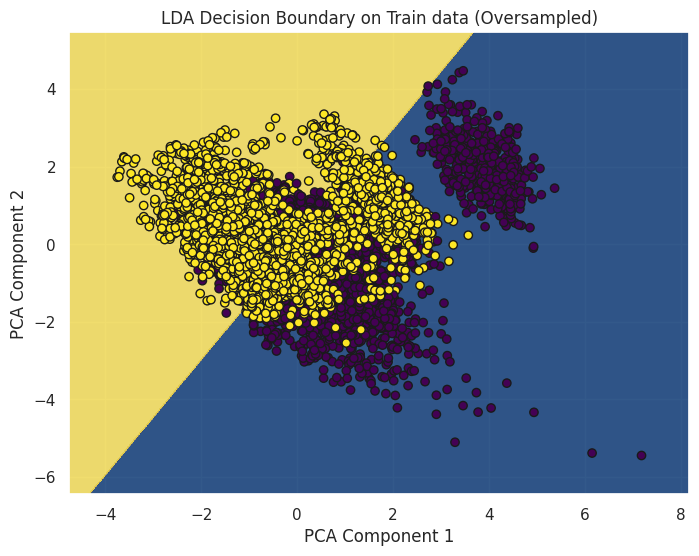

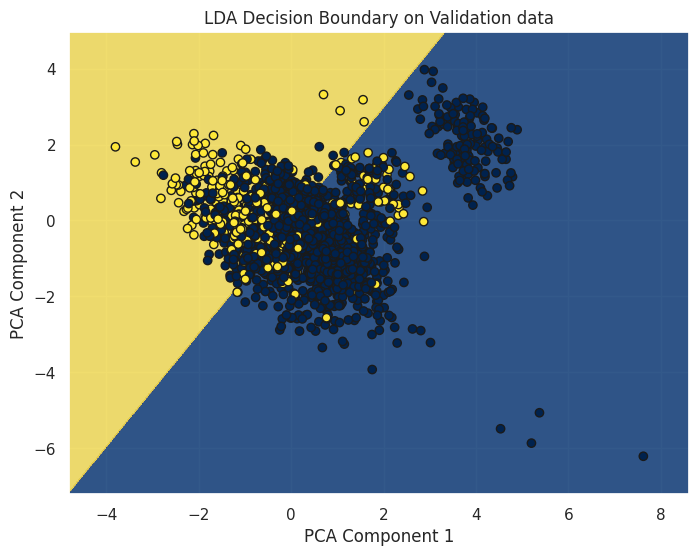

Accuracy score on the validation set: 0.74
Accuracy score on the training set (oversampled): 0.75
Confusion Matrix for Validation Data:
[[1254  446]
 [  89  237]]

Confusion Matrix for Training Data (Oversampled):
[[3814 1285]
 [1232 3867]]


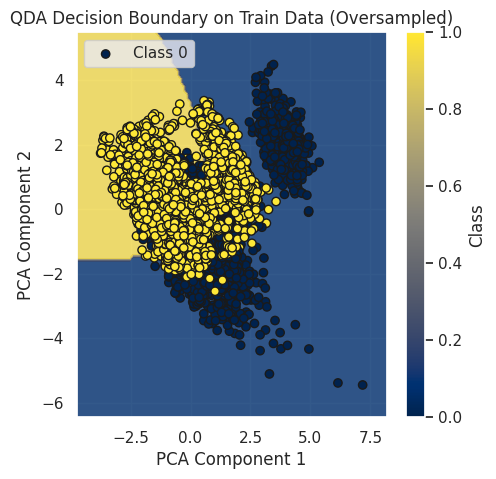

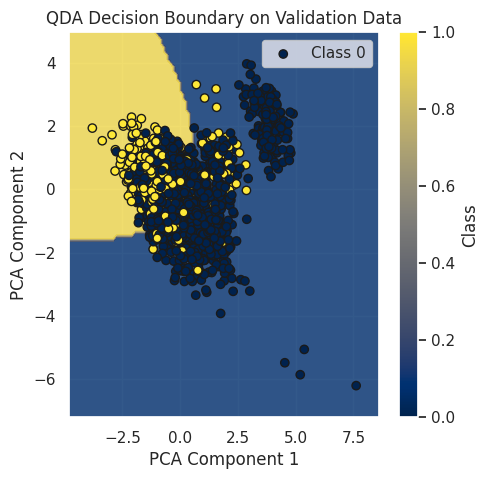


 • Training Accuracy Score :  72.43
 • Cross Validation Score : 72.48
 ❖ Testing Accuracy Score :  69.05
 • Precision Score is : 30.83
 • Recall Score is : 74.23
 • F1-Score Score is : 43.56
--------------------------------------------------------------------------------


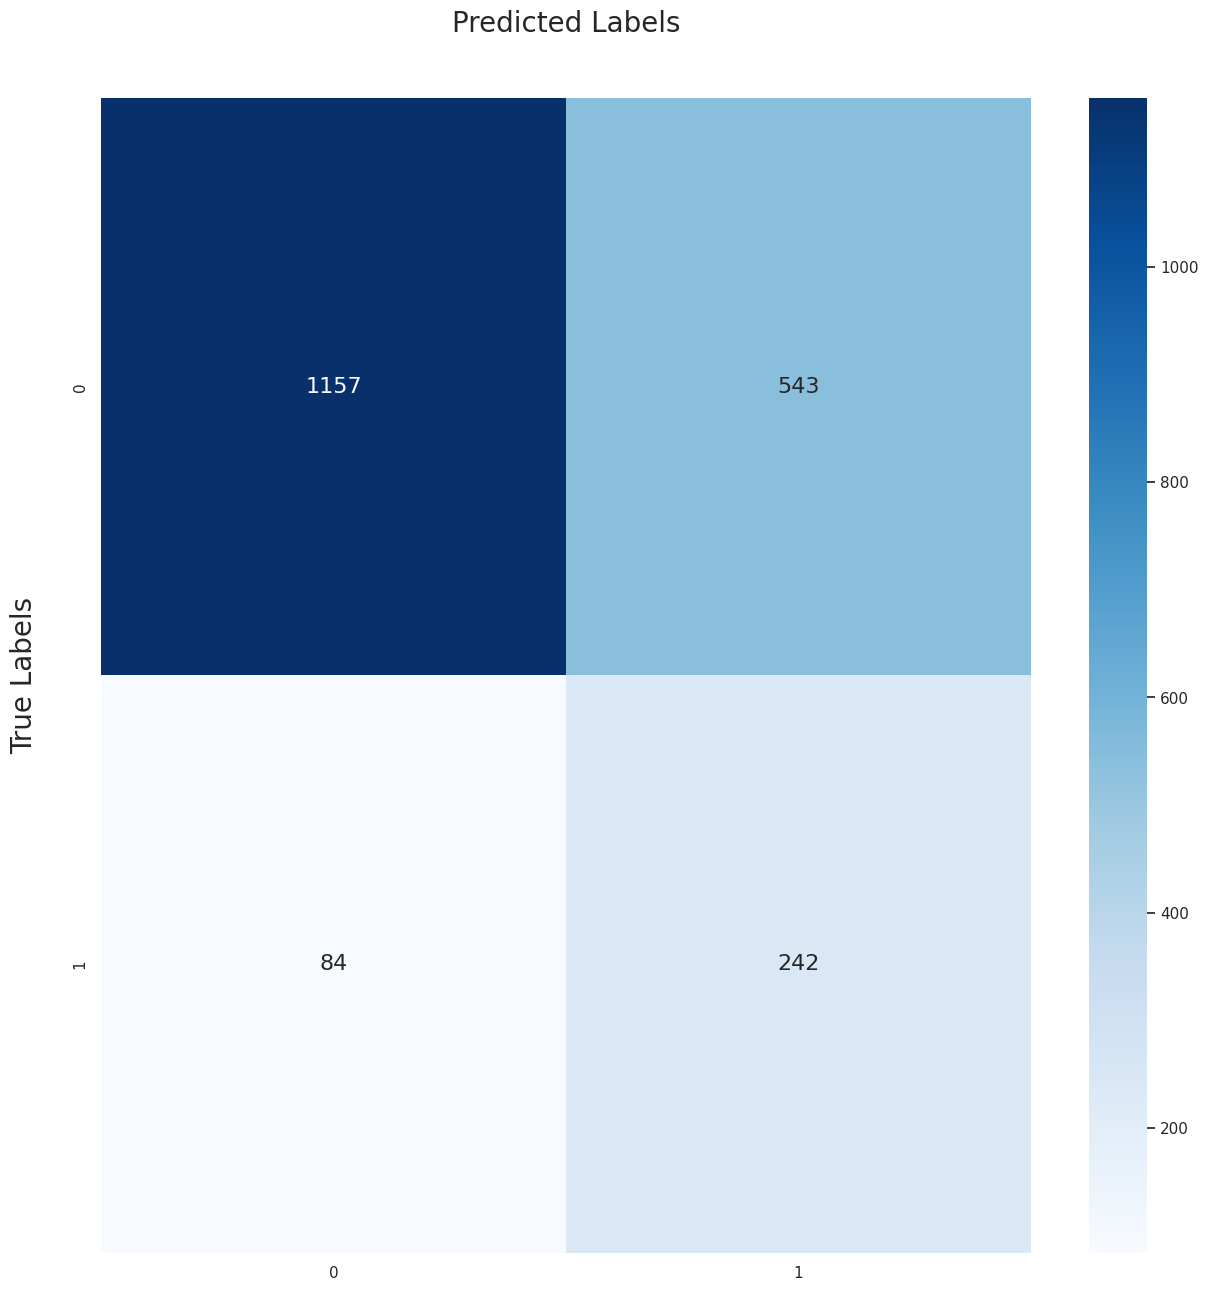

--------------------------------------------------------------------------------


In [112]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
# Import necessary libraries for Evaluate_Performance function if not already imported
from termcolor import colored
import numpy as np
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


# Re-create X_train_over and y_train_over using SMOTE (assuming this was done earlier in the notebook but the variables might have been overwritten or not globally available)
# If SMOTE was applied correctly earlier and X_train_over and y_train_over exist with shape (10198, num_features) and (10198,) respectively, you can skip this block
# Assuming SMOTE was performed before this block, if not, you need to add the SMOTE code here.
# For example:
# from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state=42)
# X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


# Apply PCA for 2 components on the oversampled training data and validation data
pca = PCA(n_components=2)
# Fit PCA on the oversampled training data
X_train_over_pca = pca.fit_transform(X_train_over)
# Transform the validation data using the fitted PCA
X_val_pca = pca.transform(X_val)

clf_lda = LinearDiscriminantAnalysis()
# Fit LDA on the PCA-transformed oversampled training data
clf_lda.fit(X_train_over_pca, y_train_over)
# Predict on the PCA-transformed validation data
y_pred = clf_lda.predict(X_val_pca)
# Predict on the PCA-transformed oversampled training data for evaluation
y_fit =  clf_lda.predict(X_train_over_pca)


# --- LDA Plotting on Train Data ---
# Assuming clf_lda is already trained on X_train_over_pca and y_train_over

# Define a meshgrid for the 2D feature space
h = .02  # Step size in the mesh
x_min, x_max = X_train_over_pca[:, 0].min() - 1, X_train_over_pca[:, 0].max() + 1
y_min, y_max = X_train_over_pca[:, 1].min() - 1, X_train_over_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Get predicted labels for each point in the meshgrid
Z = clf_lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap='cividis', alpha=0.8)
# Use the PCA-transformed oversampled training data and target
plt.scatter(X_train_over_pca[:, 0], X_train_over_pca[:, 1], c=y_train_over, cmap='viridis', edgecolors='k', label='Train Data')
plt.title('LDA Decision Boundary on Train data (Oversampled)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# --- LDA Plotting on Test Data (using Validation set) ---
# Assuming clf_lda is already trained and X_val_pca is the transformed validation data

# Define a meshgrid for the 2D feature space
h = .02  # Step size in the mesh
x_min, x_max = X_val_pca[:, 0].min() - 1, X_val_pca[:, 0].max() + 1
y_min, y_max = X_val_pca[:, 1].min() - 1, X_val_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Get predicted labels for each point in the meshgrid
Z = clf_lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap='cividis', alpha=0.8)
# Use the PCA-transformed validation data and validation target
plt.scatter(X_val_pca[:, 0], X_val_pca[:, 1], c=y_val, cmap='cividis', edgecolors='k', label='Validation Data')
plt.title('LDA Decision Boundary on Validation data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# --- LDA Evaluation using Accuracy and Confusion Matrix ---
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming y_val is the true labels for the validation set
# Assuming y_train_over is the true labels for the oversampled training set
# Assuming y_pred are predictions on X_val_pca
# Assuming y_fit are predictions on X_train_over_pca

# Calculate accuracy scores
accuracy_val = accuracy_score(y_val, y_pred) # Evaluate on Validation set
accuracy_train = accuracy_score(y_train_over, y_fit) # Evaluate on oversampled Train set

# Print accuracy scores
print(f"Accuracy score on the validation set: {accuracy_val:.2f}")
print(f"Accuracy score on the training set (oversampled): {accuracy_train:.2f}")

# Create confusion matrices
cm_val = confusion_matrix(y_val, y_pred) # Confusion matrix for Validation set
cm_train = confusion_matrix(y_train_over, y_fit) # Confusion matrix for oversampled Train set

# Print confusion matrices
print("Confusion Matrix for Validation Data:")
print(cm_val)
print("\nConfusion Matrix for Training Data (Oversampled):")
print(cm_train)


# --- QDA Plotting on Train Data (using oversampled data) ---
# This cell should be based on X_train_over_pca and y_train_over

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import matplotlib.pyplot as plt

# Step 3: Apply PCA for 2 components (Already done above as X_train_over_pca and X_val_pca)
# pca = PCA(n_components=2)
# X_train_pca_q = pca.fit_transform(X_train_over)
# X_test_pca_q= pca.transform(X_val) # Using X_val for QDA test data

# Step 4: Fit Quadratic Discriminant Analysis (QDA) on oversampled PCA data
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train_over_pca, y_train_over) # Fit QDA on oversampled PCA train data

# Step 5: Plot the Results for Train Data (Oversampled)
plt.figure(figsize=(5, 5))
# Plot decision regions
x_min, x_max = X_train_over_pca[:, 0].min() - 1, X_train_over_pca[:, 0].max() + 1
y_min, y_max = X_train_over_pca[:, 1].min() - 1, X_train_over_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = qda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap='cividis')

# Scatter plot of oversampled training data
plt.scatter(X_train_over_pca[:, 0], X_train_over_pca[:, 1], c=y_train_over, edgecolors='k', cmap='cividis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('QDA Decision Boundary on Train Data (Oversampled)')
plt.colorbar(label='Class')
# Correct the legend as it was pointing to 'Train Data' previously even on test plot
plt.legend(['Class 0', 'Class 1']) # Adjust labels based on your class values if needed
plt.show()

# --- QDA Plotting on Test Data (using Validation set) ---
# This cell should be based on X_val_pca and y_val

# Step 5: Plot the Results for Validation Data
plt.figure(figsize=(5,5))

# Plot decision regions
x_min, x_max = X_val_pca[:, 0].min() - 1, X_val_pca[:, 0].max() + 1
y_min, y_max = X_val_pca[:, 1].min() - 1, X_val_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = qda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap='cividis')

# Scatter plot of validation data
plt.scatter(X_val_pca[:, 0], X_val_pca[:, 1], c=y_val, edgecolors='k', cmap='cividis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('QDA Decision Boundary on Validation Data')
plt.colorbar(label='Class')
# Correct the legend as it was pointing to 'Train Data' previously
plt.legend(['Class 0', 'Class 1']) # Adjust labels based on your class values if needed
plt.show()

# --- QDA Evaluation using Evaluate_Performance function ---
# Call the function with the correct PCA transformed data and target variables
Evaluate_Performance(QuadraticDiscriminantAnalysis() , X_train_over_pca, X_val_pca, y_train_over, y_val)

DT

In [113]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Define the Decision Tree Classifier
dt_smote = DecisionTreeClassifier(random_state=42)

# Define the hyperparameters and their ranges to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    # Add other parameters and their ranges
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=dt_smote, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_over, y_train_over)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Retrain the model using the best parameters
best_dt_over = grid_search.best_estimator_
best_dt_over.fit(X_train_over, y_train_over)

Best parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 0.9395980344074853


DecisionTreeClassifier(max_depth=10, random_state=42)

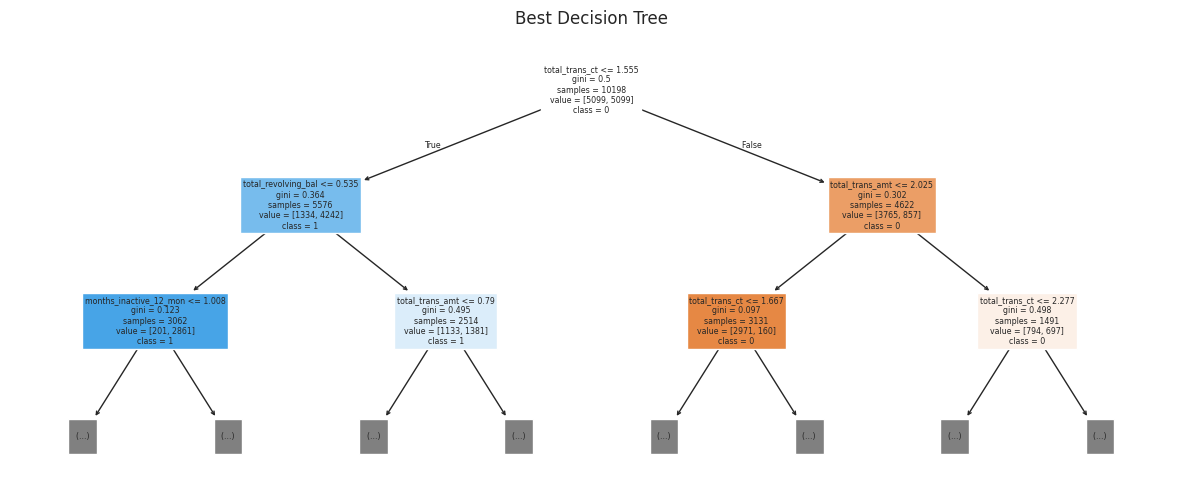

In [114]:

plt.figure(figsize=(15, 6))
plot_tree(best_dt_over, max_depth=2, filled=True, feature_names=X_train_over.columns, class_names=['0', '1'])
plt.title("Best Decision Tree")
plt.show()

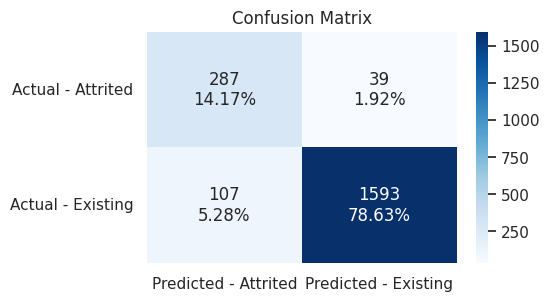

In [115]:

make_confusion_matrix(best_dt_over, X_val, y_val)

Random Forest

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best score: 0.9734269970862302


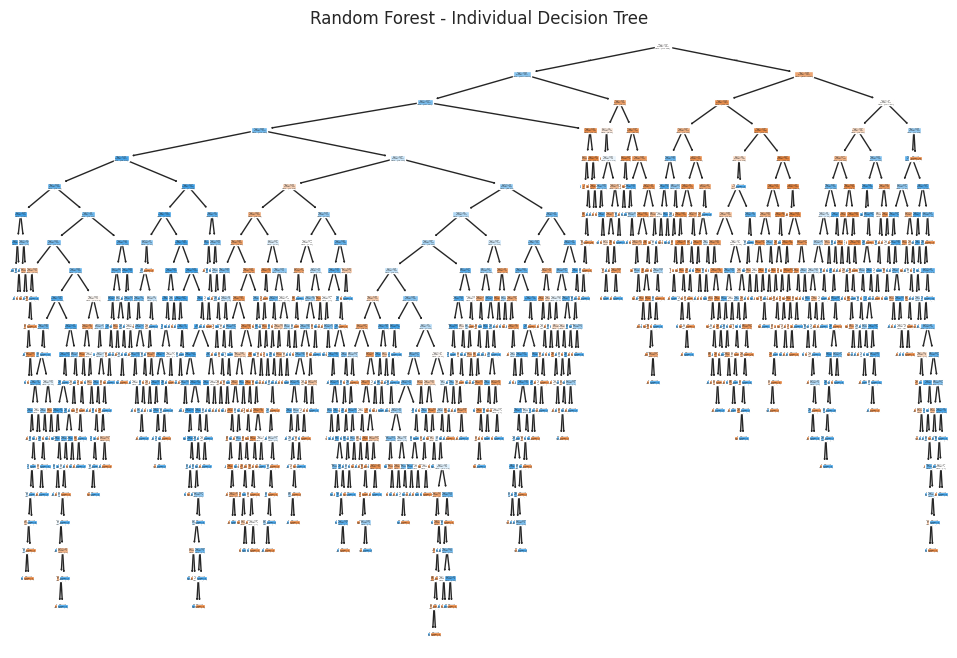

In [116]:
from sklearn.datasets import make_classification
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


# Define the Random Forest Classifier
rf_smote = RandomForestClassifier(random_state=42)

# Define the hyperparameters and their ranges to search
param_grid = {
    'n_estimators': [100, 200 ],
    'max_depth': [None, 5, 7 ],
    'min_samples_split': [2, 5,],
    'min_samples_leaf': [1, 2]
    # Add other parameters and their ranges
}

# Use GridSearchCV to find the best parameters
grid_search1 = GridSearchCV(estimator=rf_smote, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search1.fit(X_train_over, y_train_over)

print("Best parameters:", grid_search1.best_params_)
print("Best score:", grid_search1.best_score_)

# Retrain the model using the best parameters
best_rf_over = grid_search1.best_estimator_
best_rf_over.fit(X_train_over, y_train_over)

# Plotting an individual tree from the Random Forest
# Let's say you want to plot the first tree (index 0)
plt.figure(figsize=(12, 8))
plot_tree(best_rf_over.estimators_[0], filled=True)
plt.title("Random Forest - Individual Decision Tree")
plt.show()

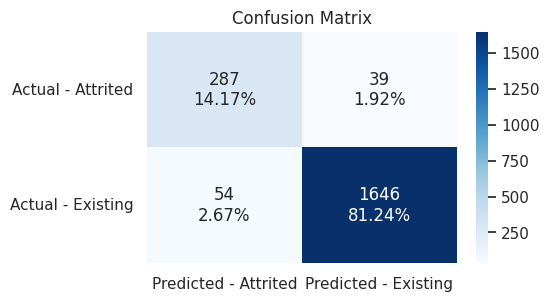

In [117]:

make_confusion_matrix(best_rf_over, X_val, y_val)